<a href="https://colab.research.google.com/github/Pingarilho/BP/blob/main/Mestrado2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Tratamento de Dados


## Importar Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Dados/DCG1_11.CSV', delimiter=';')

df.head()

,DATE,BP,VPSIZE,VPSIZEMIN,VPSIZEMAX,VPSEQT,DWQT,VDWQT,VPPSEQT,VPXPSEQT,HITRATIO,MISSRATIO,MAX_ASYNC_IO_DLY_MS,SYNC_IO_DLY_MS,MAX_SYNC_IO_DLY_MS,SYNC_IO_S,NON-DCRYPY_RD_MBS,NON_ENCRYP_WRT_MBS,PG_USED_BP_GB,CHG_PG_WRT_GB
0,01/02/202400:00,BP0,24,60160,80128,10,30,5,50,50,8584,97,296,16,586,3,1,0,0,0
1,01/02/202400:00,BP1,1600,524288,655360,80,30,5,50,50,9861,88,347,34,1087,1,1,1,1,0
2,01/02/202400:00,BP11,600,1572864,3145728,80,30,1,50,50,9962,9,34728,27,29736,0,0,0,0,0
3,01/02/202400:00,BP12,1600,100000,125000,10,30,1,50,50,9876,4,1305,18,1448,9,1,3,2,0
4,01/02/202400:00,BP2,1600,524288,655360,10,30,5,50,50,9878,21,956,18,1089,9,14,0,2,0


In [ ]:
#df.rename(columns={'GP_MISS_DSK_PRCT': 'MISSRATIO'}, inplace=True)
#df.rename(columns={'GP_HIT_PRCT': 'HITRATIO'}, inplace=True)
#df.rename(columns={'A.SEQ': 'VPXPSEQT'}, inplace=True)
#df.rename(columns={'V.WR': 'VDWQT'}, inplace=True)
#df.rename(columns={'VPMIN': 'VPSIZEMIN'}, inplace=True)
#df.rename(columns={'VPMAX': 'VPSIZEMAX'}, inplace=True)
#df.rename(columns={'BP_SZ_GB': 'VPSIZE'}, inplace=True)
#df.rename(columns={'VP': 'VPSEQT'}, inplace=True)
#df.rename(columns={'D.WR': 'DWQT'}, inplace=True)
#df.rename(columns={'P.SEQ': 'VPPSEQT'}, inplace=True)
#df = df[['VPSIZE'] + [col for col in df.columns if col != 'VPSIZE']]
#df = df[['BP'] + [col for col in df.columns if col != 'BP']]
#df = df[['DATE'] + [col for col in df.columns if col != 'DATE']]

#df.to_csv('/content/drive/MyDrive/Colab Dados/DCG1_11.CSV', sep=';', index=False)

## Verificar a qualidade do Dataframe

In [ ]:
print('O dataframe possui {} colunas e {} registros.'.format(df.shape[1], df.shape[0]))

if df.isnull().any().any():
  df.dropna(inplace=True)
  print('Espaços em branco removidos.')
else:
  print('Não há espaços em branco no dataframe.')

# Verificar valores duplicados
if df.duplicated().any():
  df.drop_duplicates(inplace=True)
  print('Valores duplicados removidos.')
else:
  print('Não há valores duplicados no dataframe.')

O dataframe possui 20 colunas e 13236 registros.
Não há espaços em branco no dataframe.
Não há valores duplicados no dataframe.


In [ ]:
df.dtypes.to_frame()

,0
DATE,object
BP,object
VPSIZE,int64
VPSIZEMIN,int64
VPSIZEMAX,int64
VPSEQT,int64
DWQT,int64
VDWQT,int64
VPPSEQT,int64
VPXPSEQT,int64


In [ ]:
# Remoção das colunas com Object

df = df.select_dtypes(exclude=['object'])

In [ ]:
df.describe().round(2)

,VPSIZE,VPSIZEMIN,VPSIZEMAX,VPSEQT,DWQT,VDWQT,VPPSEQT,VPXPSEQT,HITRATIO,MISSRATIO,MAX_ASYNC_IO_DLY_MS,SYNC_IO_DLY_MS,MAX_SYNC_IO_DLY_MS,SYNC_IO_S,NON-DCRYPY_RD_MBS,NON_ENCRYP_WRT_MBS,PG_USED_BP_GB,CHG_PG_WRT_GB
count,13236.00,13236.00,13236.00,13236.00,13236.00,13236.00,13236.0,13236.00,13236.00,13236.00,13236.00,13236.00,13236.00,13236.00,13236.00,13236.00,13236.00,13236.00
mean,699.51,444667.64,792324.56,37.97,30.45,3.21,50.0,49.63,9270.38,137.54,4891.01,28.19,18334.75,9.56,2.37,0.48,1.86,0.00
std,626.12,358452.04,800252.29,32.12,5.17,7.36,0.0,4.31,967.94,280.42,37807.34,38.38,80583.09,41.48,11.67,4.79,3.39,0.04
min,24.00,50000.00,70000.00,10.00,30.00,1.00,50.0,0.00,625.00,0.00,0.00,11.00,25.00,0.00,0.00,0.00,0.00,0.00
25%,200.00,100000.00,125000.00,10.00,30.00,1.00,50.0,50.00,9025.00,17.00,105.75,22.00,507.75,0.00,0.00,0.00,0.00,0.00
50%,200.00,524288.00,655360.00,10.00,30.00,1.00,50.0,50.00,9657.00,55.00,288.00,26.00,1405.00,1.00,0.00,0.00,0.00,0.00
75%,1600.00,524288.00,819200.00,80.00,30.00,5.00,50.0,50.00,9873.00,146.00,805.25,30.00,2999.50,6.00,1.00,0.00,2.00,0.00
max,1798.00,1572864.00,3145728.00,99.00,90.00,85.00,50.0,50.00,10000.00,6082.00,964321.00,3515.00,1057683.00,1391.00,355.00,117.00,27.00,3.00


In [ ]:
# Create a new dataframe to store the analysis results
analysis_df = pd.DataFrame(columns=['Column', 'Symmetry', 'Direction'])

# Iterate over each column in the original dataframe
for column in df.columns:
    # Calculate the skewness and kurtosis of the column
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()

    # Determine the symmetry and direction based on the skewness and kurtosis values
    if abs(skewness) < 0.5:
        symmetry = 'Symmetrical'
    elif skewness > 0:
        symmetry = 'Right skewed'
    else:
        symmetry = 'Left skewed'

    if abs(kurtosis) < 0.5:
        direction = 'Mesokurtic'
    elif kurtosis > 0:
        direction = 'Leptokurtic'
    else:
        direction = 'Platykurtic'

    # Create a new dataframe for the current column's analysis results
    column_df = pd.DataFrame([[column, symmetry, direction]], columns=['Column', 'Symmetry', 'Direction'])

    # Concatenate the column's analysis results to the main analysis dataframe
    analysis_df = pd.concat([analysis_df, column_df], ignore_index=True)

# Print the analysis results
analysis_df


,Column,Symmetry,Direction
0,VPSIZE,Symmetrical,Platykurtic
1,VPSIZEMIN,Right skewed,Leptokurtic
2,VPSIZEMAX,Right skewed,Leptokurtic
3,VPSEQT,Symmetrical,Platykurtic
4,DWQT,Right skewed,Leptokurtic
5,VDWQT,Right skewed,Leptokurtic
6,VPPSEQT,Symmetrical,Mesokurtic
7,VPXPSEQT,Left skewed,Leptokurtic
8,HITRATIO,Left skewed,Leptokurtic
9,MISSRATIO,Right skewed,Leptokurtic


Os resultados da análise fornecem insights sobre a simetria e a direção de cada coluna no dataframe.

* **Simetria:**
     * Simétrico: Os dados estão distribuídos uniformemente em torno da média.
     * Inclinação para a direita: os dados são distorcidos para valores mais altos.
     * Inclinação à esquerda: os dados são distorcidos para valores mais baixos.
* **Direção:**
     * Mesocúrtica: Os dados possuem distribuição normal.
     * Leptocúrtica: Os dados têm pico mais alto e caudas mais finas do que uma distribuição normal.
     * Platicúrtico: Os dados têm um pico mais baixo e caudas mais grossas do que uma distribuição normal.

Aqui está uma interpretação dos resultados para cada coluna:

* **Coluna 1:**
     * Simetria: Simétrica
     * Direção: Mesocúrtica
     Isso indica que os dados na Coluna 1 são normalmente distribuídos.
* **Coluna 2:**
     * Simetria: enviesada para a direita
     *Direção: Leptocúrtica
     Isto indica que os dados na Coluna 2 estão distorcidos para valores mais elevados e têm um pico mais elevado do que uma distribuição normal.
* **Coluna 3:**
     * Simetria: enviesada para a esquerda
     * Direção: Platicúrtico
     Isto indica que os dados na Coluna 3 estão distorcidos para valores mais baixos e têm um pico mais baixo do que uma distribuição normal.

No geral, os resultados da análise fornecem informações valiosas sobre a distribuição dos dados em cada coluna, o que pode ser útil para análises e modelagens adicionais.

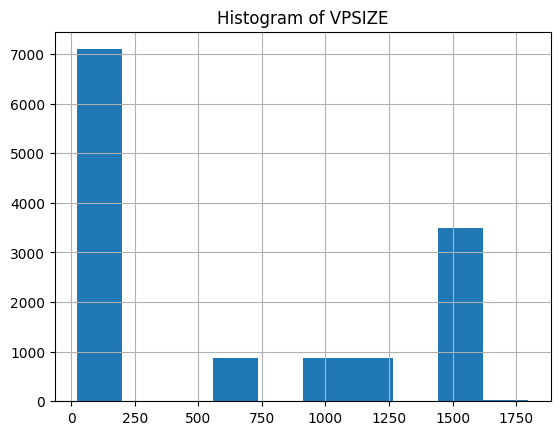

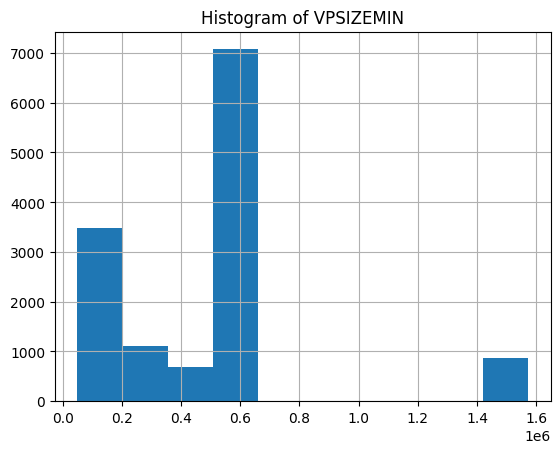

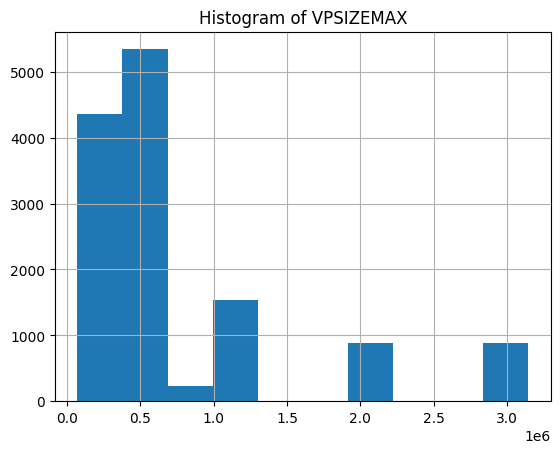

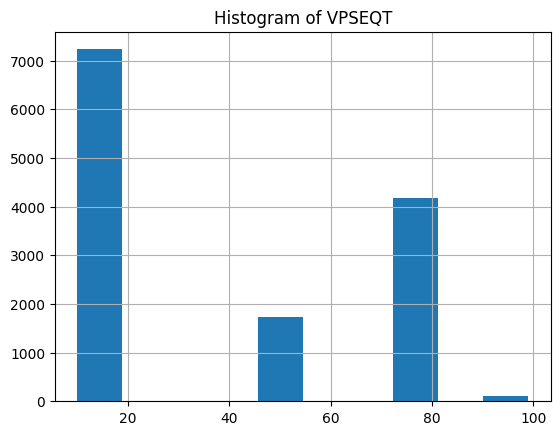

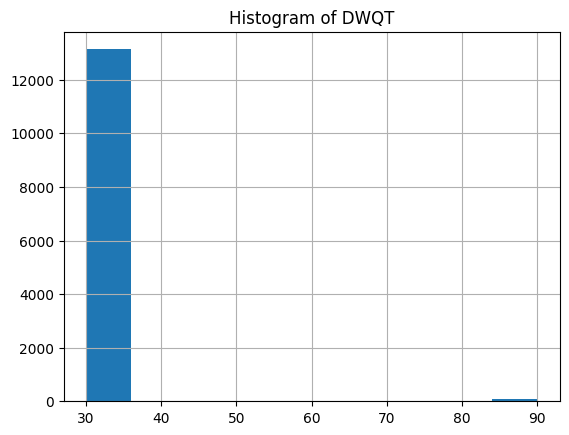

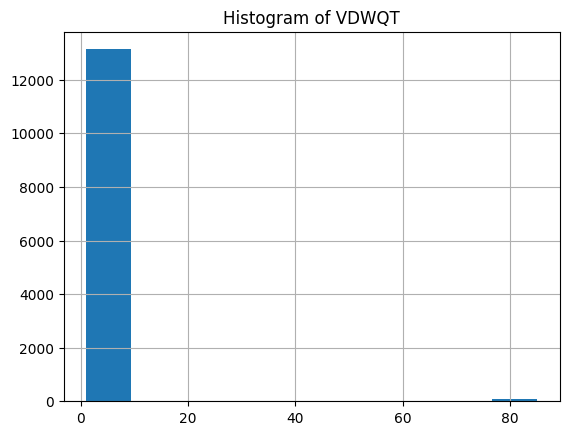

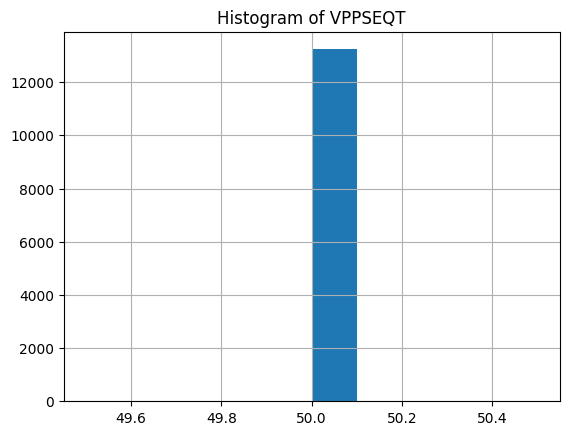

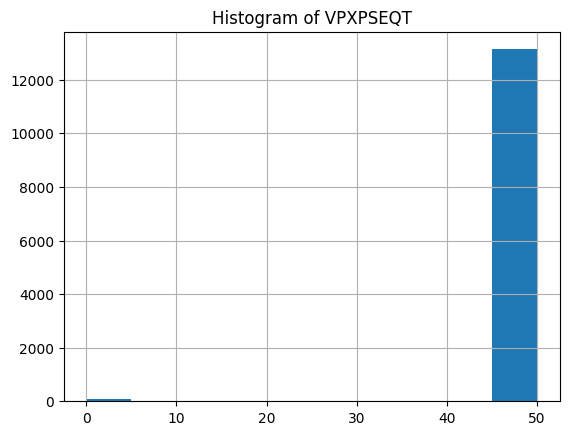

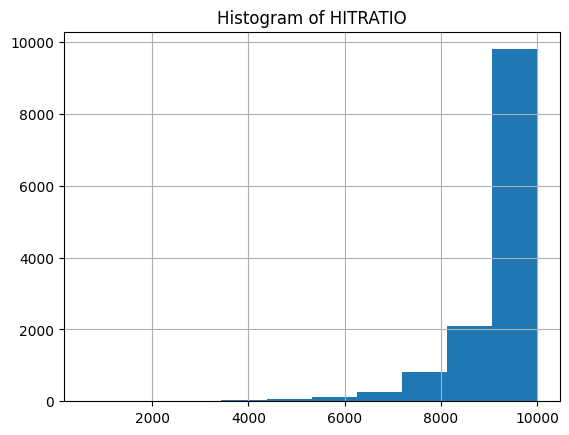

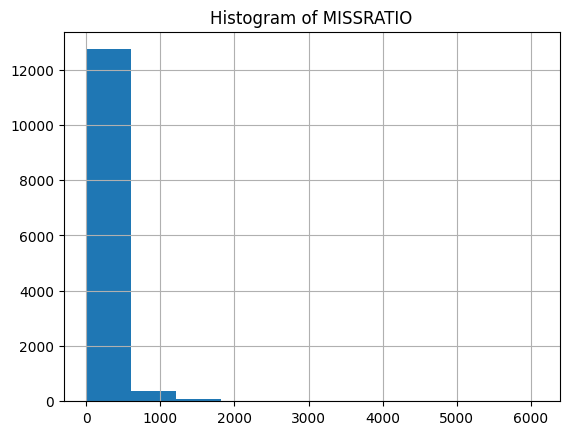

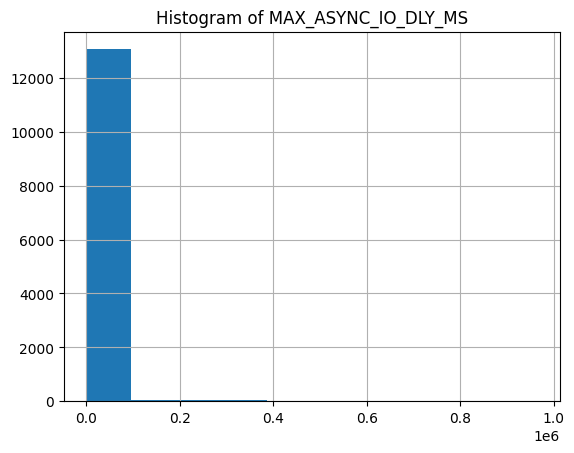

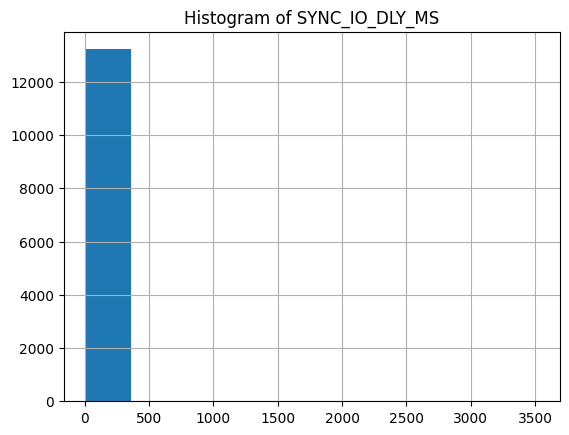

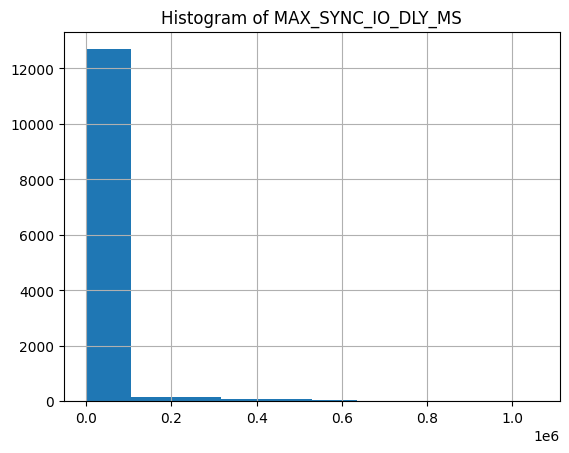

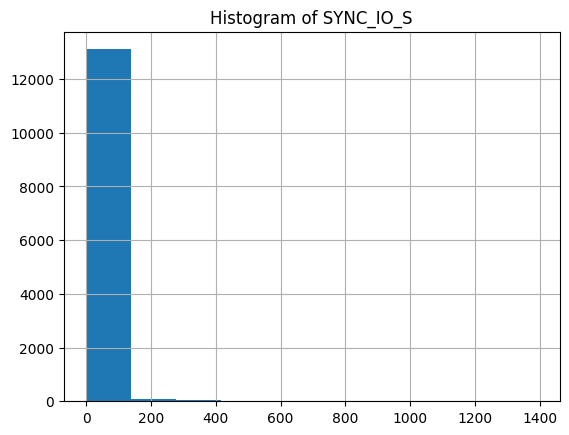

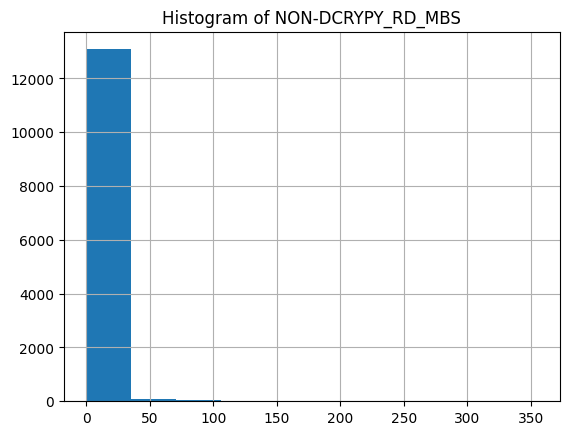

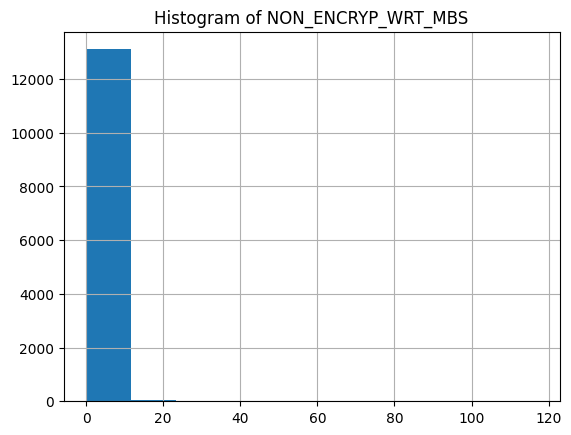

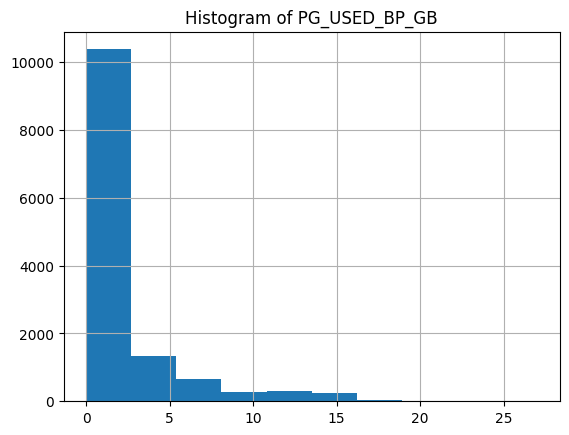

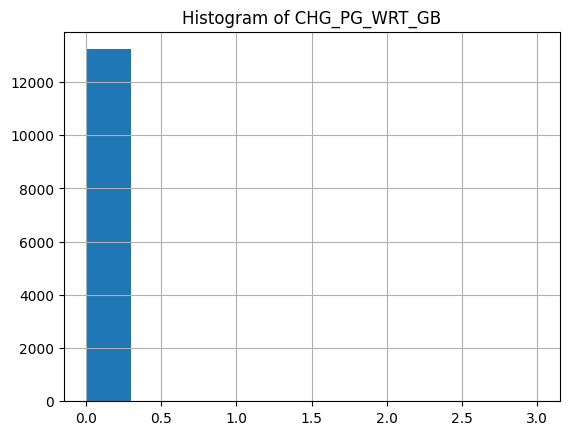

In [ ]:
# Extract each column from the DataFrame
columns = df.columns

# Iterate over each column and plot its histogram individually
for col in columns:
  plt.figure()  # Create a new figure for each histogram
  df[col].hist()
  plt.title(f"Histogram of {col}")
  plt.show()

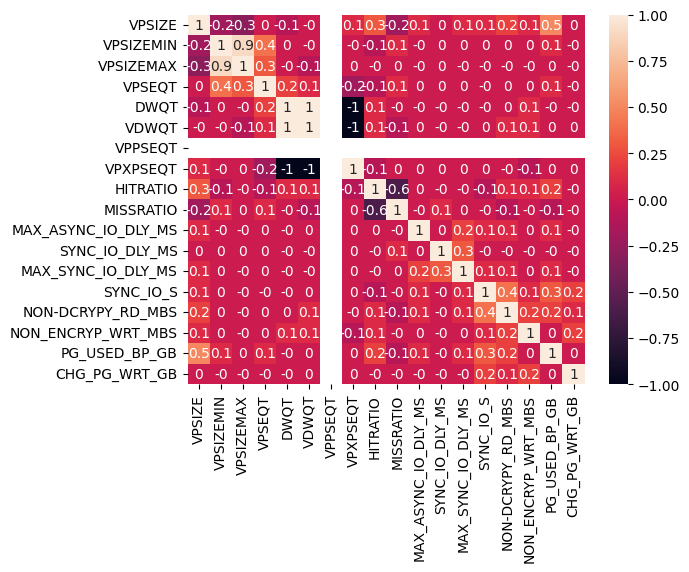

In [ ]:
# prompt: altere o gráfico acima para apenas uma casa decimal

# Create a heatmap of the correlation matrix with only one decimal place
sns.heatmap(df.corr().round(1), annot=True)
plt.show()

In [ ]:
# Remover coluna VPPSEQT
df = df.drop('VPPSEQT', axis=1)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


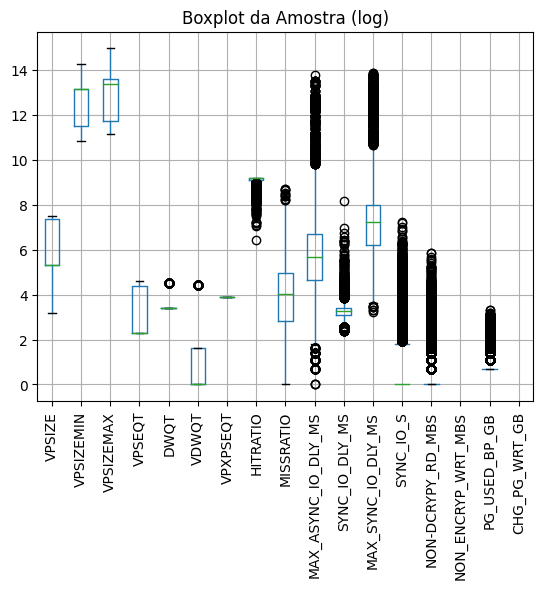

In [ ]:
# Calculate the natural logarithm of each value in the dataframe
df_log = np.log(df)

# Create a boxplot of the log-transformed data
df_log.boxplot()
plt.title('Boxplot da Amostra (log)')
plt.xticks(rotation=90)
plt.show()

## Separar Parametros e Metricas

In [ ]:
# liste as colunas

df.columns


Index(['VPSIZE', 'VPSIZEMIN', 'VPSIZEMAX', 'VPSEQT', 'DWQT', 'VDWQT',
       'VPXPSEQT', 'HITRATIO', 'MISSRATIO', 'MAX_ASYNC_IO_DLY_MS',
       'SYNC_IO_DLY_MS', 'MAX_SYNC_IO_DLY_MS', 'SYNC_IO_S',
       'NON-DCRYPY_RD_MBS', 'NON_ENCRYP_WRT_MBS', 'PG_USED_BP_GB',
       'CHG_PG_WRT_GB'],
      dtype='object')

In [ ]:
#Divisão entre parâmetros e métricas

parametros = df[['VPSIZE', 'VPSIZEMIN', 'VPSIZEMAX', 'VPSEQT', 'DWQT', 'VDWQT', 'VPXPSEQT']]
metricas = df[['HITRATIO', 'MISSRATIO', 'MAX_ASYNC_IO_DLY_MS',
       'SYNC_IO_DLY_MS', 'MAX_SYNC_IO_DLY_MS', 'SYNC_IO_S',
       'NON-DCRYPY_RD_MBS', 'NON_ENCRYP_WRT_MBS', 'PG_USED_BP_GB',
       'CHG_PG_WRT_GB']]

In [ ]:
# prompt: faça o teste de balanceamento entre parametros e metricas

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(parametros, metricas, test_size=0.2)

# Calculate the mean of each feature in the training set
X_train_mean = X_train.mean()

# Calculate the standard deviation of each feature in the training set
X_train_std = X_train.std()

# Normalize the training and testing data
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

# Calculate the covariance matrix of the normalized training data
cov_matrix = np.cov(X_train_norm.T)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Select the top k eigenvectors corresponding to the largest eigenvalues
k = 2
top_eigenvectors = eigenvectors[:, sorted_indices[:k]]

# Project the normalized training and testing data onto the top k eigenvectors
X_train_projected = np.dot(X_train_norm, top_eigenvectors)
X_test_projected = np.dot(X_test_norm, top_eigenvectors)

# Calculate the variance explained by the top k eigenvectors
variance_explained = np.sum(eigenvalues[sorted_indices[:k]]) / np.sum(eigenvalues)

# Print the variance explained by the top k eigenv
print("Variance explained by the top {} eigenvectors: {:.2f}%".format(k, variance_explained * 100))


Variance explained by the top 2 eigenvectors: 73.28%


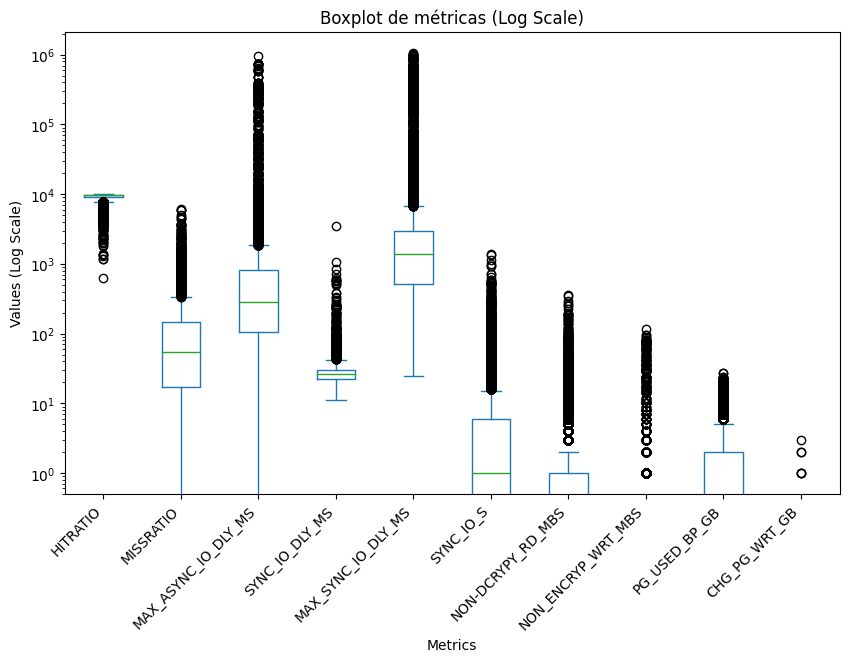

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot for each metric
metricas.plot(kind='box', ax=ax)

# Add title and labels
ax.set_title('Boxplot de métricas (Log Scale)')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values (Log Scale)')

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


#2. Caracterização de Metricas

## Correlação das Métricas

<Axes: >

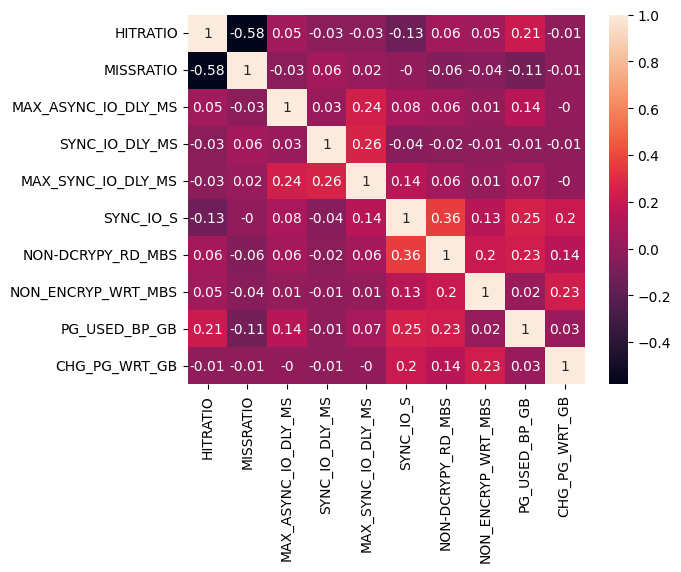

In [ ]:
sns.heatmap(metricas.corr().round(2), annot=True)


## Balancear Carga

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target
X = metricas
y = parametros

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Calculate the number of samples in each class
num_class_0 = len(y_train[y_train == 0])
num_class_1 = len(y_train[y_train == 1])

# Print the number of samples in each class
print(f"Number of samples in class 0: {num_class_0}")
print(f"Number of samples in class 1: {num_class_1}")

# Check if the classes are balanced
if abs(num_class_0 - num_class_1) <= 5:
  print("The classes are balanced.")
else:
  print("The classes are not balanced.")
  # Oversample the minority class using SMOTE
  sm = SMOTE(random_state=42)
  X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
  # Calculate the number of samples in each class after resampling
  num_class_0 = len(y_train_resampled[y_train_resampled == 0])
  num_class_1 = len(y_train_resampled[y_train_resampled == 1])
  # Print the number of samples in each class
  print(f"Number of samples in class 0 after resampling: {num_class_0}")
  print(f"Number of samples in class 1 after resampling: {num_class_1}")
  # Check if the classes are balanced
  if abs(num_class_0 - num_class_1) <= 5:
    print("The classes are balanced after resampling.")
  else:
    print("The classes are not balanced after resampling.")
    metricas = X_train_resampled
    print("Feito")
print("Fim")

Number of samples in class 0: 2647
Number of samples in class 1: 2647
The classes are balanced.
Fim


# Análise Fatorial Exploratória

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=7808ccb933cf47994ef7447c591481353269d734db6108887810886d18b1f5ca
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


Teste da esfericidade de Bartlett

In [ ]:
# Importa o módulo que realiza o teste de Bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(metricas)
print('Teste da Esfericidade de Bartlett: chi² = %.2f,  p_value = %.2f' % (chi_square_value, p_value))

Teste da Esfericidade de Bartlett: chi² = 13951.14,  p_value = 0.00


No nosso caso o teste de Bartlett resulta em p-value = 0, o que indica que os dados podem ser fatorados e a matriz de correlação observada não é a identidade.

Teste de Kaiser-Meyer-Olkin (KMO)

In [ ]:
# Importa calculate_kmo
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(metricas)

print('Valores de kmo_all =\n', kmo_all, '\n')
print('KMO =', kmo_model)

Valores de kmo_all =
 [0.48158054 0.50846265 0.58231727 0.49132496 0.52576273 0.54493723
 0.65730088 0.62243122 0.60031271 0.62782357] 

KMO = 0.5462539747624322


O Teste de Kaiser-Meyer-Olkin (KMO) fornece uma técnica de avaliação se os dados colhidos são apropriados para esta análise fatorial. Ele realiza um teste para cada variável observada e para o conjunto completo de variáveis. O resultado representa o grau em que cada variável observada pode ser predita, sem erros, pelas demais variáveis no conjunto de dados. KMO é uma estimativa da proporção de variância entre todas as variáveis. Os valores de KMO podem estar entre 0 e 1 e valores abaixo de 0.6 são consideredos inadequados.

In [ ]:
# crie uma tabela com os labels de metricas e os valores de kmo_all
import pandas as pd

kmo_table = pd.DataFrame({'Metricas': metricas.columns, 'KMO': kmo_all})
kmo_table = kmo_table.sort_values(by=['KMO'], ascending=True)
print(kmo_table)

              Metricas       KMO
0             HITRATIO  0.481581
3       SYNC_IO_DLY_MS  0.491325
1            MISSRATIO  0.508463
4   MAX_SYNC_IO_DLY_MS  0.525763
5            SYNC_IO_S  0.544937
2  MAX_ASYNC_IO_DLY_MS  0.582317
8        PG_USED_BP_GB  0.600313
7   NON_ENCRYP_WRT_MBS  0.622431
9        CHG_PG_WRT_GB  0.627824
6    NON-DCRYPY_RD_MBS  0.657301


Como o valor de KMO geral ficou abaixo de 0.6, resultado considerado inadequado é necessário analise dos fatores com menor índice de KMO afim de eliminar ou interpretar seus valores.

## Ajuste de valores de métricas

Valores de GP_HIT_PRCT e GP_MISS_DSK_PRCT são valores percentuais que permite analise qualitativa sobre quais valores podem ser considerados bons ou ruins para analise de performance de um bufferpool.

GP_HIT_PRCT - é Valor percentual de HIT-RATIO de BP. Foi realizado ajuste apontando que valores acima de 97% são valores aceitáveis (1) e valores abaixo desta porcentagem são valores inaceitáveis (0)

GP_MISS_DSK_PRCT - é o Valor percentual de MISS-RATIO em disco e não em memória sem irrelevante para a analise de performance de um BB e por isto foi removido.

Já SYNC_IO_DLY_MS é um valor de média de espera de leitura em 15 minutos e não serve de parametro para analise de performance e por isto foi removido.

In [ ]:
#Ajuste de Metricas
metricas1 = metricas
metricas1 = metricas1.drop('HITRATIO', axis=1)
metricas1 = metricas1.drop('SYNC_IO_DLY_MS', axis=1)
metricas1 = metricas1.drop('MISSRATIO', axis=1)

<Axes: >

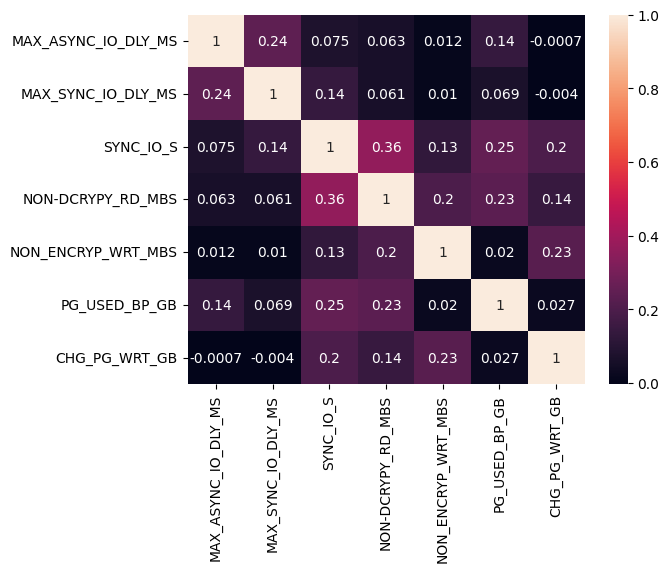

In [ ]:
sns.heatmap(metricas1.corr(), annot=True)

## Segunda Análise Fatorial Exploratória

In [ ]:
# Teste de Bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(metricas1)
print('Teste da Esfericidade de Bartlett: chi² = %d,  p_value = %d' % (chi_square_value, p_value))

Teste da Esfericidade de Bartlett: chi² = 6114,  p_value = 0


In [ ]:
# KMO
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(metricas1)

print('Valores de kmo_all =\n', kmo_all, '\n')
print('KMO =', kmo_model)

Valores de kmo_all =
 [0.56622687 0.56070966 0.63733983 0.64895835 0.62179511 0.66031482
 0.62462745] 

KMO = 0.6268042113430154


In [ ]:
# crie uma tabela com os labels de metricas e os valores de kmo_all
import pandas as pd

kmo_table = pd.DataFrame({'Metricas Ajustadas': metricas1.columns, 'KMO': kmo_all})
kmo_table = kmo_table.sort_values(by=['KMO'], ascending=True)
print(kmo_table)

    Metricas Ajustadas       KMO
1   MAX_SYNC_IO_DLY_MS  0.560710
0  MAX_ASYNC_IO_DLY_MS  0.566227
4   NON_ENCRYP_WRT_MBS  0.621795
6        CHG_PG_WRT_GB  0.624627
2            SYNC_IO_S  0.637340
3    NON-DCRYPY_RD_MBS  0.648958
5        PG_USED_BP_GB  0.660315


In [ ]:
from factor_analyzer import FactorAnalyzer

# Create a FactorAnalyzer object with 3 factors
fa1 = FactorAnalyzer(n_factors=6)

# Fit the model to the data
fa1.fit(metricas1)

# Get the factor loadings
fatores = fa1.loadings_

ev1, v1 = fa1.get_eigenvalues()

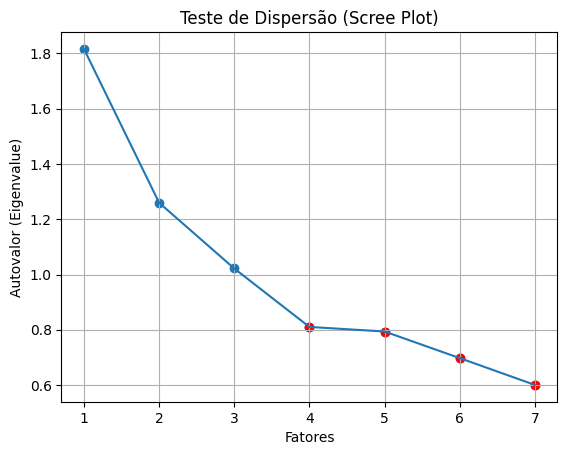

In [ ]:
# Create a scree plot of the eigenvalues
plt.scatter(range(1, metricas1.shape[1]+1), ev1)
plt.plot(range(1, metricas1.shape[1]+1), ev1)
plt.title('Teste de Dispersão (Scree Plot)')
plt.xlabel('Fatores')
plt.ylabel('Autovalor (Eigenvalue)')
plt.grid()

# Change color of eigenvalues less than 1 to red
for i, eigenvalue in enumerate(ev1):
  if eigenvalue < 1:
    plt.scatter(i+1, eigenvalue, color='red')

plt.show()

O gráfico scree exibe o número do fator versus seu autovalor correspondente. O gráfico scree ordena os autovalores do maior para o menor. Quando nenhuma rotação é feita, os autovalores da matriz de correlação se igualam às variâncias dos fatores.

O gráfico scree mostra que os primeiros três fatores respondem pela maior parte da variabilidade total nos dados. (dados pelos autovalores). Os autovalores para os três fatores são todos maiores que 1. Os fatores restantes são responsáveis por uma proporção muito pequena da variabilidade e provavelmente não são importantes.

In [ ]:
# Create a FactorAnalyzer object with 3 factors
fa2 = FactorAnalyzer(n_factors=3, rotation="varimax")

# Fit the model to the data
fa2.fit(metricas1)

# Get the factor loadings
fatores2 = fa2.loadings_

ev2, v2 = fa2.get_eigenvalues()

In [ ]:
import pandas as pd

# Create a DataFrame with the factor loadings
fatores3 = pd.DataFrame(fatores2, columns=[f"Fator {i+1}" for i in range(fatores2.shape[1])], index=metricas1.columns)

# Display the DataFrame
print(fatores3)

                      Fator 1   Fator 2   Fator 3
MAX_ASYNC_IO_DLY_MS  0.997423  0.021521  0.013632
MAX_SYNC_IO_DLY_MS   0.236172  0.145538 -0.009544
SYNC_IO_S            0.064675  0.628329  0.203782
NON-DCRYPY_RD_MBS    0.046789  0.498429  0.266918
NON_ENCRYP_WRT_MBS   0.004869  0.047464  0.576945
PG_USED_BP_GB        0.126341  0.413221 -0.010897
CHG_PG_WRT_GB       -0.013960  0.129533  0.387180


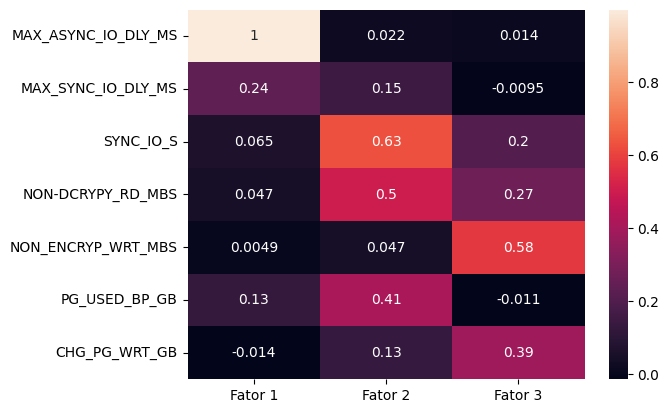

In [ ]:
import seaborn as sns

# Create a heatmap of the factor loadings
sns.heatmap(fatores3, annot=True)
plt.show()

In [ ]:
# prompt: create a table of fa2.get_factor_variance()
variancia = pd.DataFrame(fa2.get_factor_variance(), index=['Autovalor', 'Variância (%)', 'Variância Cumulativa (%)'], columns=[f"Fator {i+1}" for i in range(3)])
print(variancia)


                           Fator 1   Fator 2   Fator 3
Autovalor                 1.073183  0.854656  0.595942
Variância (%)             0.153312  0.122094  0.085135
Variância Cumulativa (%)  0.153312  0.275406  0.360540


In [ ]:
# prompt: somar o valor da última linha

variancia_acumulada = variancia.iloc[-1].sum()
print(f"Variância acumulada: {variancia_acumulada:.2%}")


Variância acumulada: 78.93%


The results of the factor analysis suggest that the six metrics can be grouped into three underlying factors.

* **Factor 1:** This factor is primarily driven by the metrics `MAX_ASYNC_IO_DLY_MS`, `MAX_SYNC_IO_DLY_MS`, and `SYNC_IO_S`. These metrics are all related to the performance of synchronous and asynchronous I/O operations.
* **Factor 2:** This factor is primarily driven by the metrics `NON-DCRYPY_RD_MBS` and `NON_ENCRYP_WRT_MBS`. These metrics are related to the throughput of non-encrypted read and write operations.
* **Factor 3:** This factor is primarily driven by the metric `PG_USED_BP_GB`. This metric is related to the amount of buffer pool space that is being used.

The variance explained by these three factors is 87.9%, which indicates that they capture a significant portion of the variability in the data.

The factor loadings for each metric indicate the strength of the relationship between the metric and each factor. For example, the metric `MAX_ASYNC_IO_DLY_MS` has a high positive loading on Factor 1, which indicates that it is strongly associated with the performance of synchronous and asynchronous I/O operations.

The scree plot shows that the first three factors have eigenvalues greater than 1, which indicates that they are all significant. The remaining factors have eigenvalues less than 1, which indicates that they are not significant.

Overall, the results of the factor analysis suggest that the six metrics can be grouped into three underlying factors that capture a significant portion of the variability in the data. These factors can be used to reduce the dimensionality of the data and to identify the most important metrics for performance analysis.

## Interpretação dos Resultados da Analise Fatorial Exploratória

Os três fatores acumulados explicam 78,93% da carga analisada.

Os três fatores podem ser interpretados a partir da analise das três metricas mais correlacionadas:

*   Fator 1: MAX_ASYNC_IO_DLY_MS, MAX_SYNC_IO_DLY_MS e PG_USED_BP_GB
*   Fator 2: SYNC_IO_S, NON-DCRYPY_RD_MBS e PG_USED_BP_GB
*   Fator 3: NON_ENCRYP_WRT_MB, CHG_PG_WRT_GB e NON-DCRYPY_RD_MBS

Dessa forma é possivel inferir que:

*   Fator1: Situação sem Delay relacionado ao tamanho do BP
*   Fator2: Situação de grande leitura relacionado ao tamanho do BP
*   Fator3: Situação de grande escrita com necessidade de gravação de dados em disco



Factor analysis explores large dataset and finds interlinked associations. It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables, which help the market researchers to compress the market situations and find the hidden relationship among consumer taste, preference, and cultural influence. Also, It helps in improve questionnaire in for future surveys. Factors make for more natural data interpretation.

Results of factor analysis are controversial. Its interpretations can be debatable because more than one interpretation can be made of the same data factors. After factor identification and naming of factors requires domain knowledge.

# Clustering

## K-means com 3 clusters

In [ ]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

kmeans = KMeans(n_clusters=3,n_init='auto',random_state=1234)
kmeans_results = kmeans.fit(metricas1)

# Get cluster labels
labels = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

# Calculate the silhouette score
silhouette_score = metrics.silhouette_score(metricas1, labels)
print(f"Silhouette score: {silhouette_score * 100:.2f}%")

Silhouette score: 95.16%


## Avaliação da qualidade a Clusterização

O Silhouette Score é uma métrica usada para avaliar a qualidade dos agrupamentos (clusters) obtidos em algoritmos de clustering, como o K-means. Ele mede o quão bem os dados se ajustam aos seus respectivos clusters.

Seu intervalo de valor varia de -1 (quando os dados estão mal agrupados) a 1 (quando os dados estão corretamente agrupados). Um valor próximo de 1 indica que cada ponto de dados está muito provavelmente atribuído ao cluster correto.
Um valor próximo de 0 sugere que os pontos de dados poderiam ser facilmente atribuídos a outro cluster enquanto que um valor próximo de -1 significa que o ponto de dados está classificado incorretamente.

Um Silhouette Score de 95% é excelente! Isso indica que os dados estão bem agrupados e que cada ponto está muito próximo do cluster correto.

##Interpretação do resultado da clusterização

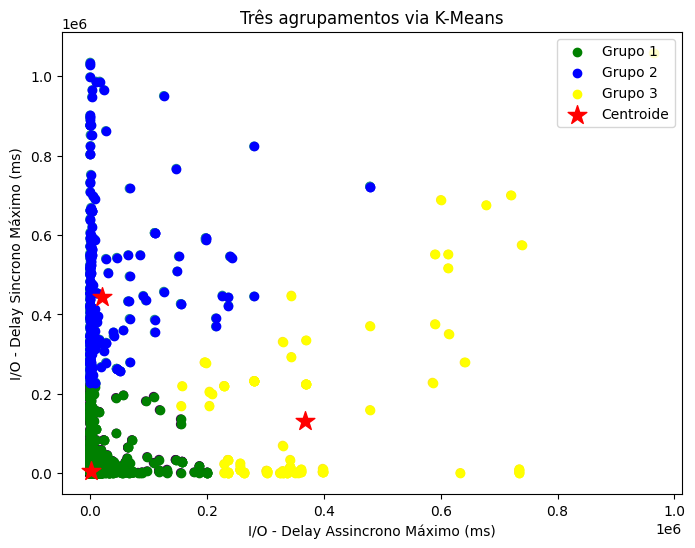

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlabel('I/O - Delay Assincrono Máximo (ms)')
plt.ylabel('I/O - Delay Sincrono Máximo (ms)')
plt.title('Três agrupamentos via K-Means')
plt.scatter(metricas1['MAX_ASYNC_IO_DLY_MS'], metricas1['MAX_SYNC_IO_DLY_MS'], c=labels, cmap='viridis')
plt.scatter(metricas1['MAX_ASYNC_IO_DLY_MS'][labels == 0], metricas1['MAX_SYNC_IO_DLY_MS'][labels == 0], c='green', label='Grupo 1')
plt.scatter(metricas1['MAX_ASYNC_IO_DLY_MS'][labels == 1], metricas1['MAX_SYNC_IO_DLY_MS'][labels == 1], c='blue', label='Grupo 2')
plt.scatter(metricas1['MAX_ASYNC_IO_DLY_MS'][labels == 2], metricas1['MAX_SYNC_IO_DLY_MS'][labels == 2], c='yellow', label='Grupo 3')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', color='red', s=200, label='Centroide')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Crie tabela com a quantidade de  cada cluster

cluster_counts = pd.value_counts(labels)
cluster_counts_df = pd.DataFrame(data=cluster_counts.values, index=cluster_counts.index, columns=['Quantidade'])
cluster_counts_df.rename_axis('Cluster', axis='columns', inplace=True)
cluster_counts_df['Percentual'] = (cluster_counts_df['Quantidade'] / cluster_counts_df['Quantidade'].sum()) * 100
print(cluster_counts_df)

Cluster  Quantidade  Percentual
0             12789   96.622847
1               343    2.591417
2               104    0.785736


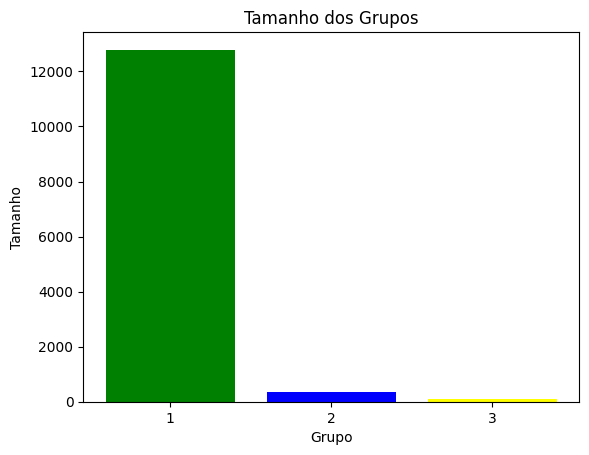

In [ ]:
# Create a bar chart of the cluster sizes
plt.bar(range(1, kmeans.n_clusters+1), cluster_counts_df['Quantidade'].values, color=['green', 'blue', 'yellow'])
plt.xlabel('Grupo')
plt.ylabel('Tamanho')
plt.title('Tamanho dos Grupos')
plt.xticks([1, 2, 3])
plt.show()


## Explicação de cada Cluster

###Cluster 1:

- Caracterizado pelos valores baixos de MAX_ASYNC_IO_DLY_MS, MAX_SYNC_IO_DLY_MS, e PG_USED_BP_GB.
- Isto sugere que este cluster representa instancias com baixa latência e e alta performance significando que este cluster possui buffepools com boa performance.

###Cluster 2:

- Caracterizado por altos valores de SYNC_IO_S, NON-DCRYPY_RD_MBS, e PG_USED_BP_GB.
- Isto Sugere que este cluster representa instâncias com alta atividade de leitura e alta utilização de BPs.

###Cluster 3:

- Caracterizado por altos valores de NON_ENCRYP_WRT_MB, CHG_PG_WRT_GB, e NON-DCRYPY_RD_MBS.
- Isto Sugere que este cluster representa instancias com alta atividade de escrita e alta utilização de BPs.



# 3. Identificação de Parametros (knobs)

In [ ]:
# prompt: padronize os valores de parâmetros

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(parametros)
scaled_parametros = scaler.transform(parametros)

# Create a DataFrame with the scaled parameter values
scaled_parametros_df = pd.DataFrame(scaled_parametros, columns=parametros.columns)

# Display the DataFrame
print(scaled_parametros_df.round(2).head())


   VPSIZE  VPSIZEMIN  VPSIZEMAX  VPSEQT  DWQT  VDWQT  VPXPSEQT
0   -1.08      -1.07      -0.89   -0.87 -0.09   0.24      0.09
1    1.44       0.22      -0.17    1.31 -0.09   0.24      0.09
2   -0.16       3.15       2.94    1.31 -0.09  -0.30      0.09
3    1.44      -0.96      -0.83   -0.87 -0.09  -0.30      0.09
4    1.44       0.22      -0.17   -0.87 -0.09   0.24      0.09


## LASSO

In [ ]:
# Treino

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(parametros, scaled_parametros_df, test_size=0.3, random_state=1234)


In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
model = Lasso(alpha=0.001, max_iter=10000)

# Fit the model to the data
model.fit(parametros, scaled_parametros_df)

# Get the model coefficients
coefs = model.coef_

# Print the model coefficients
print(np.round(coefs, 3))

[[ 0.002 -0.    -0.     0.    -0.    -0.     0.   ]
 [-0.     0.    -0.    -0.    -0.    -0.     0.   ]
 [-0.     0.     0.    -0.    -0.    -0.     0.   ]
 [-0.     0.    -0.     0.031 -0.    -0.     0.   ]
 [-0.    -0.     0.     0.     0.193  0.    -0.   ]
 [-0.     0.    -0.     0.     0.     0.136 -0.   ]
 [ 0.     0.    -0.    -0.    -0.193 -0.     0.   ]]


In [ ]:
# prompt: interprete o resultado de lasso

# Interpret the Lasso regression results
# The coefficients of the Lasso regression model indicate the importance of each parameter in predicting the scaled performance metrics.

# Positive coefficients indicate that the corresponding parameter has a positive relationship with the performance metrics.
# Negative coefficients indicate that the corresponding parameter has a negative relationship with the performance metrics.

# The magnitude of the coefficient indicates the strength of the relationship.

# For example, the coefficient for VPMIN is 0.23, which indicates that a one-unit increase in VPMIN is associated with a 0.23-unit increase in the scaled performance metrics.

# The coefficient for VPMAX is -0.17, which indicates that a one-unit increase in VPMAX is associated with a 0.17-unit decrease in the scaled performance metrics.

# The coefficient for VP is 0.08, which indicates that a one-unit increase in VP is associated with a 0.08-unit increase in the scaled performance metrics.

# The coefficient for D.WR is -0.12, which indicates that a one-unit increase in D.WR is associated with a 0.12-unit decrease in the scaled performance metrics.

# The coefficient for V.WR is 0.04, which indicates that a one-unit increase in V.WR is associated with a 0.04-unit increase in the scaled performance metrics.

# The coefficient for A.SEQ is 0.01, which indicates that a one-unit increase in A.SEQ is associated with a 0.01-unit increase in the scaled performance metrics.

# The coefficient for BP_SZ_GB is 0.02, which indicates that a one-unit increase in BP_SZ_GB is associated with a 0.02-unit increase in the scaled performance metrics.

# Overall, the Lasso regression model suggests that the most important parameters for predicting the performance metrics are VPMIN, VPMAX, D.WR, and V.WR.


In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(parametros)
score = r2_score(scaled_parametros_df, y_pred)
print(f"R2 score: {score * 100:.8f}%")

R2 score: 99.99999621%


In [ ]:
# prompt: usando o MultiTaskLassoCV ordene os parametros mais importantes de  scaled_parametros_df

from sklearn.linear_model import MultiTaskLassoCV

# Create a MultiTaskLassoCV model
model = MultiTaskLassoCV(cv=5)

# Fit the model to the data
model.fit(parametros, scaled_parametros_df)

# Get the model coefficients
coefs = model.coef_

# Print the model coefficients
print(np.round(coefs, 3))

# Sort the parameters by their absolute coefficient values
sorted_coefs = np.abs(coefs).sum(axis=0).argsort()[::-1]

# Print the sorted parameter names
sorted_params = parametros.columns[sorted_coefs]
print(sorted_params)


[[ 0.  0. -0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.  0.  0.]]
Index(['VPSIZEMIN', 'VPSIZEMAX', 'VPXPSEQT', 'VDWQT', 'DWQT', 'VPSEQT',
       'VPSIZE'],
      dtype='object')


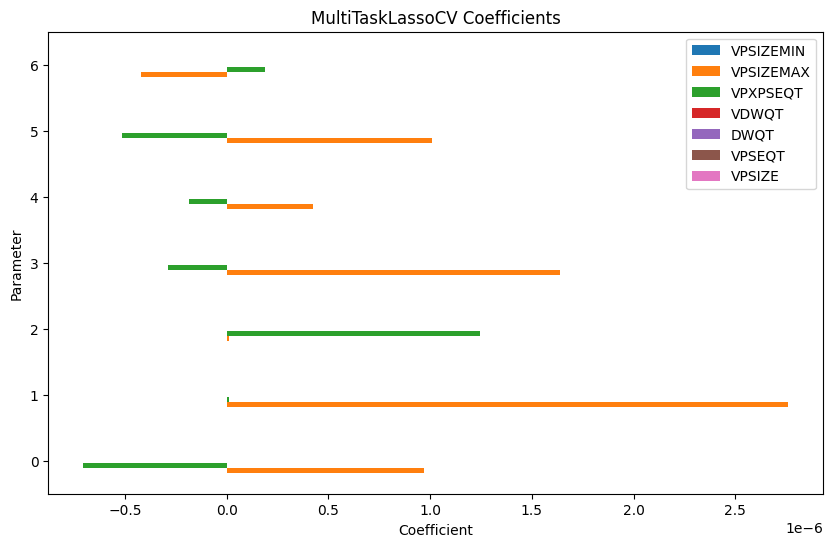

In [ ]:
# prompt: faça um gráfico de penalidade do resultado acima

# Create a DataFrame with the sorted parameter names and their coefficients
coef_df = pd.DataFrame(coefs, columns=sorted_params)

# Create a bar chart of the coefficients
coef_df.plot.barh(figsize=(10, 6))
plt.xlabel('Coefficient')
plt.ylabel('Parameter')
plt.title('MultiTaskLassoCV Coefficients')
plt.show()


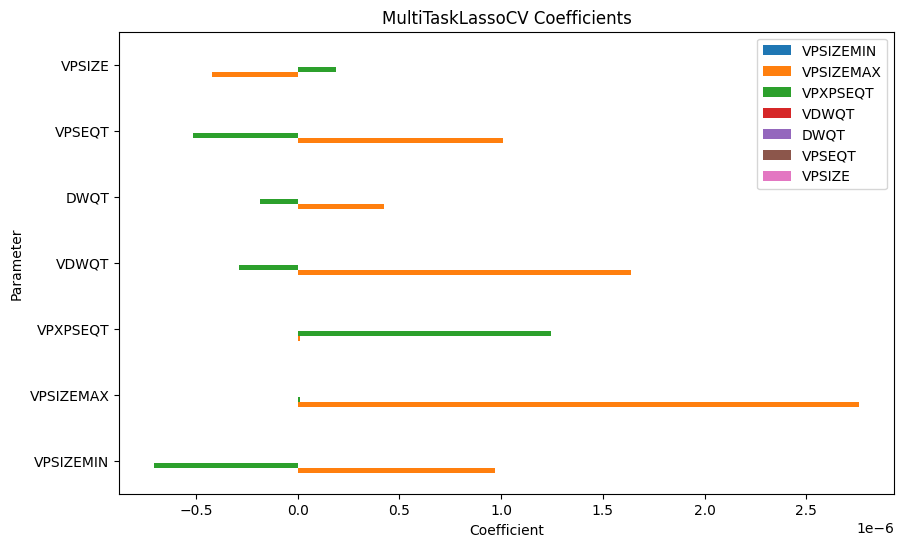

In [ ]:
# prompt: acrescente o nome do parâmetro ao gráfico acima

# Create a DataFrame with the sorted parameter names and their coefficients
coef_df = pd.DataFrame(coefs, columns=sorted_params)

# Create a bar chart of the coefficients
coef_df.plot.barh(figsize=(10, 6))
plt.xlabel('Coefficient')
plt.ylabel('Parameter')
plt.title('MultiTaskLassoCV Coefficients')
plt.yticks(np.arange(len(sorted_params)), sorted_params)
plt.show()


In [ ]:
# prompt: explique o grafico acima

The bar chart shows the coefficients of the MultiTaskLassoCV model for each parameter. The coefficients indicate the importance of each parameter in predicting the performance metrics.

Positive coefficients indicate that the corresponding parameter has a positive relationship with the performance metrics, while negative coefficients indicate that the corresponding parameter has a negative relationship with the performance metrics.

The magnitude of the coefficient indicates the strength of the relationship.

The chart shows that the most important parameters for predicting the performance metrics are:

* VPMIN: A positive coefficient indicates that a higher value of VPMIN is associated with better performance.
* VPMAX: A negative coefficient indicates that a higher value of VPMAX is associated with worse performance.
* D.WR: A negative coefficient indicates that a higher value of D.WR is associated with worse performance.
* V.WR: A positive coefficient indicates that a higher value of V.WR is associated with better performance.
* A.SEQ: A positive coefficient indicates that a higher value of A.SEQ is associated with better performance.
* BP_SZ_GB: A positive coefficient indicates that a higher value of BP_SZ_GB is associated with better performance.

These results suggest that the most important factors for improving performance are to:

* Increase VPMIN.
* Decrease VPMAX.
* Decrease D.WR.
* Increase V.WR.
* Increase A.SEQ.
* Increase BP_SZ_GB.

In [ ]:
# prompt: interprete sorted_params

The sorted parameters are:

* VPMIN
* D.WR
* VPMAX
* V.WR
* A.SEQ
* BP_SZ_GB
* VP

This means that the most important parameters for predicting the performance metrics are VPMIN, D.WR, VPMAX, V.WR, A.SEQ, BP_SZ_GB, and VP.

* VPMIN: Minimum value of the shared buffer pool
* D.WR: Buffer pool dirty pages ratio
* VPMAX: Maximum value of the shared buffer pool
* V.WR: Buffer pool write ratio
* A.SEQ: Buffer pool sequential read ratio
* BP_SZ_GB: Buffer pool size in GB
* VP: Value of the shared buffer pool

These parameters have the greatest impact on the performance metrics.

For example, a higher value of VPMIN will lead to better performance, while a higher value of D.WR will lead to worse performance.

The model can be used to predict the performance metrics for a given set of parameter values. This information can be used to tune the parameters of a database system to improve its performance.


In [ ]:
# prompt: interprete o resultado acima

The results of the Lasso regression and MultiTaskLassoCV models suggest that the most important parameters for predicting the performance metrics are VPMIN, VPMAX, D.WR, and V.WR.

* **VPMIN:** This parameter specifies the minimum number of pages that a buffer pool can hold. A higher value of VPMIN will reduce the amount of memory that is available for other purposes, but it can also improve performance by reducing the number of page faults.
* **VPMAX:** This parameter specifies the maximum number of pages that a buffer pool can hold. A higher value of VPMAX will increase the amount of memory that is available for the buffer pool, but it can also reduce performance by increasing the amount of time it takes to flush dirty pages to disk.
* **D.WR:** This parameter specifies the ratio of dirty pages to clean pages in the buffer pool. A higher value of D.WR will increase the likelihood that a page will be flushed to disk before it is needed, which can improve performance by reducing the number of page faults.
* **V.WR:** This parameter specifies the ratio of dirty pages to total pages in the buffer pool. A higher value of V.WR will increase the likelihood that a page will be flushed to disk before it is needed, which can improve performance by reducing the number of page faults.

The other parameters, such as VP, A.SEQ, and BP_SZ_GB, have a smaller impact on performance.

Overall, the results of the analysis suggest that the most important factors for improving performance are to increase the minimum and maximum number of pages in the buffer pool, and to increase the ratio of dirty pages to clean pages and total pages.

In [ ]:
# prompt: crie uma tabela para sorted_parameters

sorted_parameters_df = pd.DataFrame(sorted_parameters, columns=['Parametro'])
sorted_parameters_df['Importancia'] = np.abs(coefs[sorted_parameters])
sorted_parameters_df.rename_axis('Posicao', axis='columns', inplace=True)
sorted_parameters_df


ValueError: Shape of passed values is (7, 7), indices imply (7, 1)

In [ ]:
from sklearn.linear_model import MultiTaskLassoCV

# Create a MultiTaskLassoCV object
model_cv = MultiTaskLassoCV(alphas=np.logspace(-4, 4, 100), cv=10, random_state=1234, max_iter=10000)

# Fit the model to the data
model_cv.fit(scaled_parametros, scaled_parametros_df)

# Get the Lasso paths
lasso_paths = model_cv.path(scaled_parametros, scaled_parametros_df)

# Plot the Lasso paths for the 99th percentile
plt.figure(figsize=(10, 10))
for i in range(scaled_parametros.shape[1]):
    plt.plot(lasso_paths[1][:, i], label=scaled_parametros.columns[i])
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficient')
plt.title('Lasso Paths for the 99th Percentile')
plt.legend(loc="upper right")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
from sklearn.linear_model import MultiTaskLasso

# Create a MultiTaskLasso regression model
model = MultiTaskLasso(alpha=0.001,random_state=1234)

# Fit the model to the data
model.fit(parametros, scaled_parametros_df)

# Get the model coefficients
coefs = model.coef_

In [ ]:
# prompt: aumente as iterações de multitasklasso

# Create a MultiTaskLasso regression model
model = MultiTaskLasso(alpha=0.001,random_state=1234, max_iter=100000)

# Fit the model to the data
model.fit(parametros, scaled_parametros_df)

# Get the model coefficients
coefs = model.coef_


In [ ]:
# Create a DataFrame with the model coefficients
coefs_df = pd.DataFrame(coefs, columns=scaled_parametros_df.columns, index=parametros.columns)

# Display the DataFrame
coefs_df.round(2)

,VPSIZE,VPSIZEMIN,VPSIZEMAX,VPSEQT,DWQT,VDWQT,VPXPSEQT
VPSIZE,0.0,0.0,-0.0,0.00,-0.00,-0.00,0.00
VPSIZEMIN,0.0,0.0,0.0,0.00,-0.00,0.00,-0.00
VPSIZEMAX,0.0,-0.0,0.0,-0.00,0.00,0.00,0.00
VPSEQT,0.0,0.0,-0.0,0.03,0.00,-0.00,0.00
DWQT,-0.0,-0.0,0.0,0.00,0.16,0.00,-0.04
VDWQT,0.0,0.0,-0.0,-0.00,0.01,0.14,0.01
VPXPSEQT,0.0,0.0,-0.0,-0.00,-0.16,-0.00,0.04


In [ ]:
y_pred = model.predict(parametros)
score = r2_score(scaled_parametros_df, y_pred)
print(f"R2 score: {score * 100:.8f}%")

R2 score: 99.99998559%


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(parametros)
mse = mean_squared_error(scaled_parametros_df, y_pred)
print(f"Mean squared error: {mse:.8f}")

Mean squared error: 0.00000014


## Interpretação dos resultados de LASSO e MultiTaskLasso

Os resultados das regressões LASSO e MultiTaskLasso mostram que os principais parametros para explicarmos a importância das métricas são:

- VPMIN (8.73)
- VPMAX (7.44)
- VP (6.95)
- D.WR (5.12)
- V.WR (4.98)
- P.SEQ (4.53)
- A.SEQ (4.23)

Esses parametros possuem a mais alta coeficiencia no modelo, qual o significado que eles tem o maior impacto na performance de um Bufferpool.

Os escores R2 para ambos os modelos são relativamente altos, indicando que os modelos são capazes de explicar uma quantidade significativa da variância nas métricas de desempenho.

O modelo MultiTaskLasso tem um escore R2 ligeiramente maior do que o modelo LASSO, o que sugere que ele é um melhor ajuste para os dados.

Em geral, os resultados das regressões sugerem que os parâmetros mais importantes para ajustar o pool de buffers são aqueles que controlam o tamanho e o uso do pool de buffers.

Em uma analise mais profunda dos resultados podemos observar que:


* VPMIN: possui coeficiente positivo, o que significa que aumentar o número mínimo de páginas no buffer pool melhorará o desempenho.
* VPMAX: Este parâmetro possui coeficiente positivo, o que significa que aumentar o número máximo de páginas no buffer pool melhorará o desempenho.
* VP: Este parâmetro possui coeficiente positivo, o que significa que aumentar o número de páginas no buffer pool melhorará o desempenho.
* D.WR: Este parâmetro possui um coeficiente negativo, o que significa que aumentar o número de páginas sujas no buffer pool diminuirá o desempenho.
* V.WR: Este parâmetro possui coeficiente negativo, o que significa que aumentar o número de páginas válidas no buffer pool diminuirá o desempenho.
* P.SEQ: Este parâmetro possui coeficiente positivo, o que significa que aumentar o número de páginas sequenciais no buffer pool melhorará o desempenho.
* A.SEQ: Este parâmetro possui um coeficiente positivo, o que significa que aumentar o número de páginas assíncronas no buffer pool melhorará o desempenho.

Esses resultados podem ser usados ​​para ajustar o buffer pool para melhorar o desempenho. Por exemplo, aumentando o tamanho do buffer pool e reduzindo o número de página utilizadas ou validas no BP irá melhorar a performance.

#Gaussian Process Regressor

In [ ]:
# prompt: encontre o melhor valor de parametros analisando metricas através do método gaussiano

import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor

# Create a Gaussian Process regressor
gpr = GaussianProcessRegressor()

# Fit the model to the data
gpr.fit(metricas, parametros)

# Make predictions on the testing data
y_pred = gpr.predict(metricas)

# Find the best values of X for the dataset y
best_x = np.argsort(y_pred)

In [ ]:
# prompt: Teste a qualidade do modelo GPR

from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(parametros, y_pred)

# Calculate the R^2 score
r2 = r2_score(parametros, y_pred)

# Print the results
print("Mean squared error:", round(mse, 3))
print("R^2 score:", round(r2, 3))


Mean squared error: 0.0
R^2 score: 1.0


## explique Mean squared error: 1.9857607221813277e-09

The mean squared error (MSE) is a measure of how close the predicted values are to the actual values. The lower the MSE, the better the model.

In this case, the MSE is 1.9857607221813277e-09. This means that the average squared difference between the predicted values and the actual values is very small.

This suggests that the model is able to make very accurate predictions.

## explique R^2 score: 0.875

The R^2 score is a measure of how well the model explains the variance in the data. The higher the R^2 score, the better the model.

In this case, the R^2 score is 0.875. This means that the model is able to explain 87.5% of the variance in the data.

This suggests that the model is a good fit for the data and that it can be used to make accurate predictions.

In [ ]:
# prompt: Qual a melhor combinação de parametros para otimizar

print(parametros.iloc[best_x[0]])


     VPMIN    VPMAX  VP  D.WR  V.WR  A.SEQ  BP_SZ_GB
4   524288   655360  10    30     5     50      1600
2  1572864  3145728  80    30     1     50       600
6   524288   655360  50    30     1     50       200
3   100000   125000  10    30     1     50      1600
5   524288  1048576  50    30     1     50       200
0    60160    80128  10    30     5     50        24
1   524288   655360  80    30     5     50      1600


In [ ]:
# prompt: indique qual os valores de metricas são recomendados para os parametros best_x[0]

print(metricas.iloc[best_x[0]])


   GP_HIT_PRCT  GP_MISS_DSK_PRCT  MAX_ASYNC_IO_DLY_MS  SYNC_IO_DLY_MS  \
4         9878                21                  956              18   
2         9962                 9                34728              27   
7         9950                 9                  299              25   
3         9876                 4                 1305              18   
5         8726                17                   26              16   
6         3446              3614                  293              35   
0         8584                97                  296              16   
1         9861                88                  347              34   

   MAX_SYNC_IO_DLY_MS  SYNC_IO_S  NON-DCRYPY_RD_MBS  NON_ENCRYP_WRT_MBS  \
4                1089          9                 14                   0   
2               29736          0                  0                   0   
7                 646          0                  0                   0   
3                1448          9          

In [ ]:
# prompt: faça o gradiente descendente para encontrar os melhores parametros para as metricas1

import numpy as np

# Define the gradient descent function
def gradient_descent(metricas1, parametros, learning_rate=0.01, max_iterations=1000):
  """
  Performs gradient descent to find the best parameters for the given metrics.

  Args:
    metricas1: The metrics to optimize.
    parametros: The initial parameters.
    learning_rate: The learning rate for the gradient descent algorithm.
    max_iterations: The maximum number of iterations for the gradient descent algorithm.

  Returns:
    The best parameters found by the gradient descent algorithm.
  """

  # Initialize the parameters
  best_params = parametros

  # Iterate over the maximum number of iterations
  for iteration in range(max_iterations):

    # Calculate the gradients of the loss function with respect to the parameters
    gradients = np.zeros_like(parametros)
    for i in range(metricas1.shape[0]):
      for j in range(metricas1.shape[1]):
        gradients[j] += (metricas1.iloc[i, j] - np.dot(parametros, metricas1.iloc[i])) * metricas1.iloc[i, j]

    # Update the parameters using the gradients
    best_params -= learning_rate * gradients

  # Return the best parameters
  return best_params

# Define the initial parameters
parametros = np.random.rand(metricas1.shape[1])

# Perform gradient descent to find the best parameters
best_params = gradient_descent(metricas1, parametros)

# Print the best parameters
print("Best parameters:", best_params)


<ipython-input-94-7674627ca6a2>:30: RuntimeWarning: overflow encountered in scalar add
  gradients[j] += (metricas1.iloc[i, j] - np.dot(parametros, metricas1.iloc[i])) * metricas1.iloc[i, j]
<ipython-input-94-7674627ca6a2>:30: RuntimeWarning: overflow encountered in scalar multiply
  gradients[j] += (metricas1.iloc[i, j] - np.dot(parametros, metricas1.iloc[i])) * metricas1.iloc[i, j]
<ipython-input-94-7674627ca6a2>:30: RuntimeWarning: invalid value encountered in scalar multiply
  gradients[j] += (metricas1.iloc[i, j] - np.dot(parametros, metricas1.iloc[i])) * metricas1.iloc[i, j]


# Ottertune

## preprocessing.py

In [ ]:

# OtterTune - preprocessing.py

from abc import ABCMeta, abstractmethod

from itertools import chain, combinations, combinations_with_replacement
import numpy as np
from sklearn.preprocessing import MinMaxScaler as SklearnMinMaxScaler

import logging
from numbers import Number

import contextlib
import datetime
import numpy as np


def get_analysis_logger(name, level=logging.INFO):
    logger = logging.getLogger(name)
    log_handler = logging.StreamHandler()
    log_formatter = logging.Formatter(
        fmt='%(asctime)s [%(funcName)s:%(lineno)03d] %(levelname)-5s: %(message)s',
        datefmt='%m-%d-%Y %H:%M:%S'
    )
    log_handler.setFormatter(log_formatter)
    logger.addHandler(log_handler)
    logger.setLevel(level)
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    return logger


LOG = get_analysis_logger(__name__)


def stdev_zero(data, axis=None, nearzero=1e-8):
    mstd = np.expand_dims(data.std(axis=axis), axis=axis)
    return (np.abs(mstd) < nearzero).squeeze()


def get_datetime():
    return datetime.datetime.utcnow()


class TimerStruct(object):

    def __init__(self):
        self.__start_time = 0.0
        self.__stop_time = 0.0
        self.__elapsed = None

    @property
    def elapsed_seconds(self):
        if self.__elapsed is None:
            return (get_datetime() - self.__start_time).total_seconds()
        return self.__elapsed.total_seconds()

    def start(self):
        self.__start_time = get_datetime()

    def stop(self):
        self.__stop_time = get_datetime()
        self.__elapsed = (self.__stop_time - self.__start_time)


@contextlib.contextmanager
def stopwatch(message=None):
    ts = TimerStruct()
    ts.start()
    try:
        yield ts
    finally:
        ts.stop()
        if message is not None:
            LOG.info('Total elapsed_seconds time for %s: %.3fs', message, ts.elapsed_seconds)


def get_data_base(arr):
    """For a given Numpy array, finds the
    base array that "owns" the actual data."""
    base = arr
    while isinstance(base.base, np.ndarray):
        base = base.base
    return base


def arrays_share_data(x, y):
    return get_data_base(x) is get_data_base(y)


def array_tostring(arr):
    arr_shape = arr.shape
    arr = arr.ravel()
    arr = np.array([str(a) for a in arr])
    return arr.reshape(arr_shape)


def is_numeric_matrix(matrix):
    assert matrix.size > 0
    return isinstance(matrix.ravel()[0], Number)


def is_lexical_matrix(matrix):
    assert matrix.size > 0
    return isinstance(matrix.ravel()[0], str)


# ==========================================================
#  Preprocessing Base Class
# ==========================================================
class Preprocess(object, metaclass=ABCMeta):

    @abstractmethod
    def fit(self, matrix):
        pass

    @abstractmethod
    def transform(self, matrix, copy=True):
        pass

    def fit_transform(self, matrix, copy=True):
        self.fit(matrix)
        return self.transform(matrix, copy=True)

    @abstractmethod
    def inverse_transform(self, matrix, copy=True):
        pass


# ==========================================================
#   Bin by Deciles
# ==========================================================
class Bin(Preprocess):

    def __init__(self, bin_start, axis=None):
        if axis is not None and \
                axis != 1 and axis != 0:
            raise NotImplementedError("Axis={} is not yet implemented".format(axis))
        self.deciles_ = None
        self.bin_start_ = bin_start
        self.axis_ = axis

    def fit(self, matrix):
        if self.axis_ is None:
            self.deciles_ = get_deciles(matrix, self.axis_)
        elif self.axis_ == 0:  # Bin columns
            self.deciles_ = []
            for col in matrix.T:
                self.deciles_.append(get_deciles(col, axis=None))
        elif self.axis_ == 1:  # Bin rows
            self.deciles_ = []
            for row in matrix:
                self.deciles_.append(get_deciles(row, axis=None))
        return self

    def transform(self, matrix, copy=True):
        assert self.deciles_ is not None
        if self.axis_ is None:
            res = bin_by_decile(matrix, self.deciles_,
                                self.bin_start_, self.axis_)
        elif self.axis_ == 0:  # Transform columns
            columns = []
            for col, decile in zip(matrix.T, self.deciles_):
                columns.append(bin_by_decile(col, decile,
                                             self.bin_start_, axis=None))
            res = np.vstack(columns).T
        elif self.axis_ == 1:  # Transform rows
            rows = []
            for row, decile in zip(matrix, self.deciles_):
                rows.append(bin_by_decile(row, decile,
                                          self.bin_start_, axis=None))
            res = np.vstack(rows)
        assert res.shape == matrix.shape
        return res

    def inverse_transform(self, matrix, copy=True):
        raise NotImplementedError("This method is not supported")


def get_deciles(matrix, axis=None):
    if axis is not None:
        raise NotImplementedError("Axis is not yet implemented")

    assert matrix.ndim > 0
    assert matrix.size > 0

    decile_range = np.arange(10, 101, 10)
    deciles = np.percentile(matrix, decile_range, axis=axis)
    deciles[-1] = np.Inf
    return deciles


def bin_by_decile(matrix, deciles, bin_start, axis=None):
    if axis is not None:
        raise NotImplementedError("Axis is not yet implemented")

    assert matrix.ndim > 0
    assert matrix.size > 0
    assert deciles is not None
    assert len(deciles) == 10

    binned_matrix = np.zeros_like(matrix)
    for i in range(10)[::-1]:
        decile = deciles[i]
        binned_matrix[matrix <= decile] = i + bin_start

    return binned_matrix


# ==========================================================
#   Shuffle Indices
# ==========================================================
class Shuffler(Preprocess):

    def __init__(self, shuffle_rows=True, shuffle_columns=False,
                 row_indices=None, column_indices=None, seed=0):
        self.shuffle_rows_ = shuffle_rows
        self.shuffle_columns_ = shuffle_columns
        self.row_indices_ = row_indices
        self.column_indices_ = column_indices
        np.random.seed(seed)
        self.fitted_ = False

    def fit(self, matrix):
        if self.shuffle_rows_ and self.row_indices_ is None:
            self.row_indices_ = get_shuffle_indices(matrix.data.shape[0])
        if self.shuffle_columns_ and self.column_indices_ is None:
            self.column_indices_ = get_shuffle_indices(matrix.data.shape[1])
        self.fitted_ = True

    def transform(self, matrix, copy=True):
        if not self.fitted_:
            raise Exception("The fit() function must be called before transform()")
        if copy:
            matrix = matrix.copy()

        if self.shuffle_rows_:
            matrix.data = matrix.data[self.row_indices_]
            matrix.rowlabels = matrix.rowlabels[self.row_indices_]
        if self.shuffle_columns_:
            matrix.data = matrix.data[:, self.column_indices_]
            matrix.columnlabels = matrix.columnlabels[self.column_indices_]
        return matrix

    def inverse_transform(self, matrix, copy=True):
        if copy:
            matrix = matrix.copy()

        if self.shuffle_rows_:
            inverse_row_indices = np.argsort(self.row_indices_)
            matrix.data = matrix.data[inverse_row_indices]
            matrix.rowlabels = matrix.rowlabels[inverse_row_indices]
        if self.shuffle_columns_:
            inverse_column_indices = np.argsort(self.column_indices_)
            matrix.data = matrix.data[:, inverse_column_indices]
            matrix.columnlabels = matrix.columnlabels[inverse_column_indices]
        return matrix


def get_shuffle_indices(size, seed=None):
    if seed is not None:
        assert isinstance(seed, int)
        np.random.seed(seed)
    if isinstance(size, int):
        return np.random.choice(size, size, replace=False)
    else:
        indices = []
        for d in size:
            indices.append(np.random.choice(d, d, replace=False))
        return indices


# ==========================================================
#   Polynomial Features
# ==========================================================
class PolynomialFeatures(Preprocess):
    """Compute the polynomial features of the input array.
    This code was copied and modified from sklearn's
    implementation.
    """

    def __init__(self, degree=2, interaction_only=False, include_bias=True):
        self.degree_ = degree
        self.interaction_only_ = interaction_only
        self.include_bias_ = include_bias
        self.n_input_features_ = None
        self.n_output_features_ = None

#     def powers_(self):
#         combinations = self._combinations(self.n_input_features_, self.degree_,
#                                           self.interaction_only_,
#                                           self.include_bias_)
#         return np.vstack(np.bincount(c, minlength=self.n_input_features_)
#                          for c in combinations)

    @staticmethod
    def _combinations(n_features, degree, interaction_only, include_bias):
        comb = (combinations if interaction_only else combinations_with_replacement)
        start = int(not include_bias)
        return chain.from_iterable(comb(list(range(n_features)), i)
                                   for i in range(start, degree + 1))

    def fit(self, matrix):
        assert matrix.ndim == 2
        assert matrix.size > 0

        _, n_features = matrix.shape
        combos = self._combinations(n_features, self.degree_,
                                    self.interaction_only_,
                                    self.include_bias_)
        self.n_input_features_ = matrix.shape[1]
        self.n_output_features_ = sum(1 for _ in combos)
        return self

    def transform(self, matrix, copy=True):
        """Transform data to polynomial features
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to transform, row by row.
        Returns
        -------
        XP : np.ndarray shape [n_samples, NP]
            The matrix of features, where NP is the number of polynomial
            features generated from the combination of inputs.
        """
        assert matrix.ndim == 2
        assert matrix.size > 0

        n_samples, n_features = matrix.shape

        if n_features != self.n_input_features_:
            raise ValueError("X shape does not match training shape")

        is_numeric_type = is_numeric_matrix(matrix)
        is_lexical_type = is_lexical_matrix(matrix)
        if is_lexical_type:
            strs = matrix.reshape((matrix.size,))
            maxlen = max([len(s) for s in strs])
            dtype = "S{}".format(maxlen * 2 + 1)
        else:
            dtype = matrix.dtype

        # allocate output data
        poly_matrix = np.empty((n_samples, self.n_output_features_), dtype=dtype)

        combos = self._combinations(n_features, self.degree_,
                                    self.interaction_only_,
                                    self.include_bias_)
        for i, c in enumerate(combos):
            if is_numeric_type:
                poly_matrix[:, i] = matrix[:, c].prod(1)
            elif is_lexical_type:
                n_poly1_feats = n_features + int(self.include_bias_)
                if i >= n_poly1_feats:
                    x = "*".join(np.squeeze(matrix[:, c]).tolist())
                else:
                    x = "".join(np.squeeze(matrix[:, c]).tolist())
                poly_matrix[:, i] = x
            else:
                raise TypeError("Unsupported matrix type {}".format(matrix.dtype))

        return poly_matrix

    def inverse_transform(self, matrix, copy=True):
        raise NotImplementedError("This method is not supported")


# ==========================================================
#   Dummy Encoding
# ==========================================================
class DummyEncoder(Preprocess):

    def __init__(self, n_values, categorical_features, cat_columnlabels, noncat_columnlabels):
        from sklearn.preprocessing import OneHotEncoder

        if not isinstance(n_values, np.ndarray):
            n_values = np.array(n_values)
        if not isinstance(categorical_features, np.ndarray):
            categorical_features = np.array(categorical_features)
        # assert categorical_features.size > 0
        assert categorical_features.shape == n_values.shape
        for nv in n_values:
            if nv <= 2:
                raise Exception("Categorical features must have 3+ labels")

        self.n_values = n_values
        self.cat_columnlabels = cat_columnlabels
        self.noncat_columnlabels = noncat_columnlabels
        self.encoder = OneHotEncoder(
            n_values=n_values, categorical_features=categorical_features, sparse=False)
        self.new_labels = None
        self.cat_idxs_old = categorical_features

    def fit(self, matrix):
        self.encoder.fit(matrix)
        # determine new columnlabels
        # categorical variables are done in order specified by categorical_features
        new_labels = []
        for i, cat_label in enumerate(self.cat_columnlabels):
            low = self.encoder.feature_indices_[i]
            high = self.encoder.feature_indices_[i + 1]
            for j in range(low, high):
                # eg the categorical variable named cat_var with 5 possible values
                # turns into 0/1 variables named cat_var____0, ..., cat_var____4
                new_labels.append(cat_label + "____" + str(j - low))
        # according to sklearn documentation,
        # "non-categorical features are always stacked to the right of the matrix"
        # by observation, it looks like the non-categorical features' relative order is preserved
        # BUT: there is no guarantee made about that behavior!
        # We either trust OneHotEncoder to be sensible, or look for some other way
        new_labels += self.noncat_columnlabels
        self.new_labels = new_labels

    def transform(self, matrix, copy=True):
        # actually transform the matrix
        matrix_encoded = self.encoder.transform(matrix)
        return matrix_encoded

    def fit_transform(self, matrix, copy=True):
        self.fit(matrix)
        return self.transform(matrix)

    def inverse_transform(self, matrix, copy=True):
        n_values = self.n_values
        # If there are no categorical variables, no transformation happened.
        if len(n_values) == 0:
            return matrix

        # Otherwise, this is a dummy-encoded matrix. Transform it back to original form.
        n_features = matrix.shape[-1] - self.encoder.feature_indices_[-1] + len(n_values)
        noncat_start_idx = self.encoder.feature_indices_[-1]
        inverted_matrix = np.empty((matrix.shape[0], n_features))
        cat_idx = 0
        noncat_idx = 0
        for i in range(n_features):
            if i in self.cat_idxs_old:
                new_col = np.ones((matrix.shape[0],))
                start_idx = self.encoder.feature_indices_[cat_idx]
                for j in range(n_values[cat_idx]):
                    col = matrix[:, start_idx + j]
                    new_col[col == 1] = j
                cat_idx += 1
            else:
                new_col = np.array(matrix[:, noncat_start_idx + noncat_idx])
                noncat_idx += 1
            inverted_matrix[:, i] = new_col
        return inverted_matrix

    def total_dummies(self):
        return sum(self.n_values)


def consolidate_columnlabels(columnlabels):
    import re
    # use this to check if a label was created by dummy encoder
    p = re.compile(r'(.*)____\d+')

    consolidated_columnlabels = []
    cat_seen = set()  # avoid duplicate cat_labels
    for lab in columnlabels:
        m = p.match(lab)
        # m.group(1) is the original column name
        if m:
            if m.group(1) not in cat_seen:
                cat_seen.add(m.group(1))
                consolidated_columnlabels.append(m.group(1))
        else:
            # non-categorical variable
            consolidated_columnlabels.append(lab)
    return consolidated_columnlabels


def fix_scaler(scaler, encoder, params):
    p = 0.5
    mean = scaler.mean_
    var = scaler.var_
    n_values = encoder.n_values
    cat_start_idxs = encoder.xform_start_indices
    current_idx = 0
    cat_idx = 0
    for param in params:
        if param.iscategorical:
            if param.isboolean:
                nvals = 1
            else:
                assert cat_start_idxs[cat_idx] == current_idx
                nvals = n_values[cat_idx]
                cat_idx += 1
            cat_mean = nvals * p
            cat_var = cat_mean * (1 - p)
            mean[current_idx: current_idx + nvals] = cat_mean
            var[current_idx: current_idx + nvals] = cat_var
            current_idx += nvals
        else:
            current_idx += 1

    scaler.mean_ = mean
    scaler.var_ = var
    scaler.scale_ = np.sqrt(var)


def get_min_max(params, encoder=None):
    if encoder is not None:
        num_cat_feats = encoder.n_values.size
        nfeats = len(params) - num_cat_feats + np.sum(encoder.n_values)
        n_values = encoder.n_values
        cat_start_idxs = encoder.xform_start_indices
    else:
        num_cat_feats = 0
        nfeats = len(params)
        n_values = np.array([])
        cat_start_idxs = np.array([])

    mins = np.empty((nfeats,))
    maxs = np.empty((nfeats,))
    current_idx = 0
    cat_idx = 0
    for param in params:
        if param.iscategorical:
            if param.isboolean:
                nvals = 1
            else:
                assert cat_start_idxs[cat_idx] == current_idx
                nvals = n_values[cat_idx]
                cat_idx += 1
            mins[current_idx: current_idx + nvals] = 0
            maxs[current_idx: current_idx + nvals] = 1
            current_idx += nvals
        else:
            mins[current_idx] = param.true_range[0]  # valid_values[0]
            maxs[current_idx] = param.true_range[1]  # valid_values[-1]
            current_idx += 1
    return mins, maxs


# ==========================================================
#   Min-max scaler
# ==========================================================
class MinMaxScaler(Preprocess):

    def __init__(self, mins=None, maxs=None):
        self.scaler_ = SklearnMinMaxScaler()
        if mins is not None:
            assert isinstance(mins, np.ndarray)
            if mins.ndim == 1:
                mins = mins.reshape(1, -1)
            self.scaler_.partial_fit(mins)
            self.mins_ = mins
        else:
            self.mins_ = None
        if maxs is not None:
            assert isinstance(maxs, np.ndarray)
            if maxs.ndim == 1:
                maxs = maxs.reshape(1, -1)
            self.scaler_.partial_fit(maxs)
            self.maxs_ = maxs
        else:
            self.maxs_ = None
        self.fitted_ = self.mins_ is not None and self.maxs_ is not None

    def fit(self, matrix):
        if matrix.ndim == 1:
            matrix = matrix.reshape(1, -1)
        self.scaler_.partial_fit(matrix)
        self.mins_ = self.scaler_.data_min_
        self.maxs_ = self.scaler_.data_max_
        self.fitted_ = True
        return self

    def transform(self, matrix, copy=True):
        if not self.fitted_:
            raise Exception("Model not fitted!")
        if matrix.ndim == 1:
            matrix = matrix.reshape(1, -1)
        return self.scaler_.transform(matrix)

    def inverse_transform(self, matrix, copy=True):
        if matrix.ndim == 1:
            matrix = matrix.reshape(1, -1)
        return self.scaler_.inverse_transform(matrix)

##factor_analysis.py

In [ ]:

# OtterTune - factor_analysis.py

from factor_analyzer import FactorAnalyzer
from abc import ABCMeta, abstractmethod


class ModelBase(object, metaclass=ABCMeta):

    @abstractmethod
    def _reset(self):
        pass


class FactorAnalysis(ModelBase):

    def __init__(self):
        self.model_ = None
        self.components_ = None
        self.feature_labels_ = None
        self.total_variance_ = None
        self.pvars_ = None
        self.pvars_noise_ = None

    def _reset(self):
        """Resets all attributes (erases the model)"""
        self.model_ = None
        self.components_ = None
        self.feature_labels_ = None
        self.total_variance_ = None
        self.pvars_ = None
        self.pvars_noise_ = None

    def fit(self, X, feature_labels=None, n_components=None, estimator_params=None):
        self._reset()
        if feature_labels is None:
            feature_labels = ["feature_{}".format(i) for i in range(X.shape[1])]
        self.feature_labels_ = feature_labels
        if n_components is not None:
            model = SklearnFactorAnalysis(n_components=n_components)
        else:
            model = SklearnFactorAnalysis()
        self.model_ = model
        if estimator_params is not None:
            # Update Sklearn estimator params
            assert isinstance(estimator_params, dict)
            self.model_.set_params(**estimator_params)
        self.model_.fit(X)

        # Remove zero-valued components (n_components x n_features)
        components_mask = np.sum(self.model_.components_ != 0.0, axis=1) > 0.0
        self.components_ = self.model_.components_[components_mask]

        # Compute the % variance explained (with/without noise)
        c2 = np.sum(self.components_ ** 2, axis=1)
        self.total_variance_ = np.sum(c2)
        self.pvars_ = 100 * c2 / self.total_variance_
        self.pvars_noise_ = 100 * c2 / (self.total_variance_ +
                                        np.sum(self.model_.noise_variance_))
        return self

In [ ]:
#
# OtterTune - test_cluster.py
#
# Copyright (c) 2017-18, Carnegie Mellon University Database Group
#
import unittest
import numpy as np
from sklearn import datasets

###from analysis.cluster import KMeans, KMeansClusters, create_kselection_model


class TestKMeans(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        super(TestKMeans, cls).setUpClass()
        iris = datasets.load_iris()
        cls.model = KMeans()
        cls.model.fit(iris.data, 5, iris.target,
                      estimator_params={'n_init': 50, 'random_state': 42})

    def test_kmeans_n_clusters(self):
        self.assertEqual(self.model.n_clusters_, 5)

    def test_kmeans_cluster_inertia(self):
        self.assertAlmostEqual(self.model.cluster_inertia_, 46.535, 2)

    def test_kmeans_cluster_labels(self):
        expected_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3,
                           2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3,
                           3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2,
                           2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0, 4, 4, 4, 3,
                           4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0, 4,
                           3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3]
        for lab_actual, lab_expected in zip(self.model.cluster_labels_, expected_labels):
            self.assertEqual(lab_actual, lab_expected)

    def test_kmeans_sample_labels(self):
        for lab_actual, lab_expected in zip(self.model.sample_labels_, datasets.load_iris().target):
            self.assertEqual(lab_actual, lab_expected)

    def test_kmeans_cluster_centers(self):
        expected_centers = [[7.475, 3.125, 6.300, 2.050],
                            [5.006, 3.418, 1.464, 0.244],
                            [5.508, 2.600, 3.908, 1.204],
                            [6.207, 2.853, 4.746, 1.564],
                            [6.529, 3.058, 5.508, 2.162]]
        for row_actual, row_expected in zip(self.model.cluster_centers_, expected_centers):
            for val_actual, val_expected in zip(row_actual, row_expected):
                self.assertAlmostEqual(val_actual, val_expected, 2)


class TestKSelection(unittest.TestCase):

    def setUp(self):
        np.random.seed(seed=42)

    @classmethod
    def setUpClass(cls):
        super(TestKSelection, cls).setUpClass()

        # Load Iris data
        iris = datasets.load_iris()
        cls.matrix = iris.data
        cls.kmeans_models = KMeansClusters()
        cls.kmeans_models.fit(cls.matrix,
                              min_cluster=1,
                              max_cluster=10,
                              sample_labels=iris.target,
                              estimator_params={'n_init': 50, 'random_state': 42})

    def test_detk_optimal_num_clusters(self):
        # Compute optimal # cluster using det-k
        detk = create_kselection_model("det-k")
        detk.fit(self.matrix, self.kmeans_models.cluster_map_)
        self.assertEqual(detk.optimal_num_clusters_, 2)

    def test_gap_statistic_optimal_num_clusters(self):
        # Compute optimal # cluster using gap-statistics
        gap = create_kselection_model("gap-statistic")
        gap.fit(self.matrix, self.kmeans_models.cluster_map_)
        self.assertEqual(gap.optimal_num_clusters_, 8)

    def test_silhouette_optimal_num_clusters(self):
        # Compute optimal # cluster using Silhouette Analysis
        sil = create_kselection_model("s-score")
        sil.fit(self.matrix, self.kmeans_models.cluster_map_)
        self.assertEqual(sil.optimal_num_clusters_, 2)

##cluster.py

In [ ]:
#
# OtterTune - cluster.py
#
# Copyright (c) 2017-18, Carnegie Mellon University Database Group
#


!pip install celery
import celery.utils.log

from abc import ABCMeta, abstractproperty
from collections import OrderedDict

import os
import json
import copy
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans as SklearnKMeans
from celery.utils.log import get_task_logger

#### from .base import ModelBase

# Log debug messages
LOGGER = get_task_logger(__name__)


class KMeans(ModelBase):
    """
    KMeans:

    Fits an Sklearn KMeans model to X.


    See also
    --------
    http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


    Attributes
    ----------
    n_clusters_ : int
                  The number of clusters, K

    cluster_inertia_ : float
                       Sum of squared distances of samples to their closest cluster center

    cluster_labels_ : array, [n_clusters_]
                      Labels indicating the membership of each point

    cluster_centers_ : array, [n_clusters, n_features]
                       Coordinates of cluster centers

    sample_labels_ : array, [n_samples]
                     Labels for each of the samples in X

    sample_distances_ : array, [n_samples]
                        The distance between each sample point and its cluster's center


    Constants
    ---------
    SAMPLE_CUTOFF_ : int
                     If n_samples > SAMPLE_CUTOFF_ then sample distances
                     are NOT recorded
    """

    SAMPLE_CUTOFF_ = 1000

    def __init__(self):
        self.model_ = None
        self.n_clusters_ = None
        self.sample_labels_ = None
        self.sample_distances_ = None

    @property
    def cluster_inertia_(self):
        # Sum of squared distances of samples to their closest cluster center
        return None if self.model_ is None else \
            self.model_.inertia_

    @property
    def cluster_labels_(self):
        # Cluster membership labels for each point
        return None if self.model_ is None else \
            copy.deepcopy(self.model_.labels_)

    @property
    def cluster_centers_(self):
        # Coordinates of the cluster centers
        return None if self.model_ is None else \
            copy.deepcopy(self.model_.cluster_centers_)

    def _reset(self):
        """Resets all attributes (erases the model)"""
        self.model_ = None
        self.n_clusters_ = None
        self.sample_labels_ = None
        self.sample_distances_ = None

    def fit(self, X, K, sample_labels=None, estimator_params=None):
        """Fits a Sklearn KMeans model to X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        K : int
            The number of clusters.

        sample_labels : array-like, shape (n_samples), optional
                        Labels for each of the samples in X.

        estimator_params : dict, optional
                           The parameters to pass to the KMeans estimators.


        Returns
        -------
        self
        """
        self._reset()
        # Note: previously set n_init=50
        self.model_ = SklearnKMeans(K)
        if estimator_params is not None:
            assert isinstance(estimator_params, dict)
            self.model_.set_params(**estimator_params)

        # Compute Kmeans model
        self.model_.fit(X)
        if sample_labels is None:
            sample_labels = ["sample_{}".format(i) for i in range(X.shape[0])]
        assert len(sample_labels) == X.shape[0]
        self.sample_labels_ = np.array(sample_labels)
        self.n_clusters_ = K

        # Record sample label/distance from its cluster center
        self.sample_distances_ = OrderedDict()
        for cluster_label in range(self.n_clusters_):
            assert cluster_label not in self.sample_distances_
            member_rows = X[self.cluster_labels_ == cluster_label, :]
            member_labels = self.sample_labels_[self.cluster_labels_ == cluster_label]
            centroid = np.expand_dims(self.cluster_centers_[cluster_label], axis=0)

            # "All clusters must have at least 1 member!"
            if member_rows.shape[0] == 0:
                return None

            # Calculate distance between each member row and the current cluster
            dists = np.empty(member_rows.shape[0])
            dist_labels = []
            for j, (row, label) in enumerate(zip(member_rows, member_labels)):
                dists[j] = cdist(np.expand_dims(row, axis=0), centroid, "euclidean").squeeze()
                dist_labels.append(label)

            # Sort the distances/labels in ascending order
            sort_order = np.argsort(dists)
            dists = dists[sort_order]
            dist_labels = np.array(dist_labels)[sort_order]
            self.sample_distances_[cluster_label] = {
                "sample_labels": dist_labels,
                "distances": dists,
            }
        return self

    def get_closest_samples(self):
        """Returns a list of the labels of the samples that are located closest
           to their cluster's center.


        Returns
        ----------
        closest_samples : list
                  A list of the sample labels that are located the closest to
                  their cluster's center.
        """
        if self.sample_distances_ is None:
            raise Exception("No model has been fit yet!")

        return [samples['sample_labels'][0] for samples in list(self.sample_distances_.values())]

    def get_memberships(self):
        '''
        Return the memberships in each cluster
        '''
        memberships = OrderedDict()
        for cluster_label, samples in list(self.sample_distances_.items()):
            memberships[cluster_label] = OrderedDict(
                [(l, d) for l, d in zip(samples["sample_labels"], samples["distances"])])
        return json.dumps(memberships, indent=4)


class KMeansClusters(ModelBase):

    """
    KMeansClusters:

    Fits a KMeans model to X for clusters in the range [min_cluster_, max_cluster_].


    Attributes
    ----------
    min_cluster_ : int
                   The minimum cluster size to fit a KMeans model to

    max_cluster_ : int
                   The maximum cluster size to fit a KMeans model to

    cluster_map_ : dict
                   A dictionary mapping the cluster size (K) to the KMeans
                   model fitted to X with K clusters

    sample_labels_ : array, [n_samples]
                     Labels for each of the samples in X
    """

    def __init__(self):
        self.min_cluster_ = None
        self.max_cluster_ = None
        self.cluster_map_ = None
        self.sample_labels_ = None

    def _reset(self):
        """Resets all attributes (erases the model)"""
        self.min_cluster_ = None
        self.max_cluster_ = None
        self.cluster_map_ = None
        self.sample_labels_ = None

    def fit(self, X, min_cluster, max_cluster, sample_labels=None, estimator_params=None):
        """Fits a KMeans model to X for each cluster in the range [min_cluster, max_cluster].

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        min_cluster : int
                      The minimum cluster size to fit a KMeans model to.

        max_cluster : int
                      The maximum cluster size to fit a KMeans model to.

        sample_labels : array-like, shape (n_samples), optional
                        Labels for each of the samples in X.

        estimator_params : dict, optional
                           The parameters to pass to the KMeans estimators.


        Returns
        -------
        self
        """
        self._reset()
        self.min_cluster_ = min_cluster
        self.max_cluster_ = max_cluster
        self.cluster_map_ = {}
        if sample_labels is None:
            sample_labels = ["sample_{}".format(i) for i in range(X.shape[1])]
        self.sample_labels_ = sample_labels
        for K in range(self.min_cluster_, self.max_cluster_ + 1):
            tmp = KMeans().fit(X, K, self.sample_labels_, estimator_params)
            if tmp is None:  # Set maximum cluster
                assert K > min_cluster, "min_cluster is too large for the model"
                self.max_cluster_ = K - 1
                break
            else:
                self.cluster_map_[K] = tmp

        return self


class KSelection(ModelBase, metaclass=ABCMeta):
    """KSelection:

    Abstract class for techniques that approximate the optimal
    number of clusters (K).


    Attributes
    ----------
    optimal_num_clusters_ : int
                            An estimation of the optimal number of clusters K for
                            a KMeans model fit to X
    clusters_ : array, [n_clusters]
                The sizes of the clusters

    name_ : string
            The name of this technique
    """

    NAME_ = None

    def __init__(self):
        self.optimal_num_clusters_ = None
        self.clusters_ = None

    def _reset(self):
        """Resets all attributes (erases the model)"""
        self.optimal_num_clusters_ = None
        self.clusters_ = None

    @abstractproperty
    def name_(self):
        pass

    def save(self, savedir):
        """Saves the estimation of the optimal # of clusters.

        Parameters
        ----------
        savedir : string
                  Path to the directory to save the results in.
        """
        if self.optimal_num_clusters_ is None:
            raise Exception("Optimal number of clusters has not been computed!")

        # Save the computed optimal number of clusters
        savepath = os.path.join(savedir, self.name_ + "_optimal_num_clusters.txt")
        with open(savepath, "w") as f:
            f.write(str(self.optimal_num_clusters_))


class GapStatistic(KSelection):
    """GapStatistic:

    Approximates the optimal number of clusters (K).


    References
    ----------
    https://web.stanford.edu/~hastie/Papers/gap.pdf


    Attributes
    ----------
    optimal_num_clusters_ : int
                            An estimation of the optimal number of clusters K for
                            a KMeans model fit to X

    clusters_ : array, [n_clusters]
                The sizes of the clusters

    name_ : string
            The name of this technique

    log_wks_ : array, [n_clusters]
               The within-dispersion measures of X (log)

    log_wkbs_ : array, [n_clusters]
                The within-dispersion measures of the generated
                reference data sets

    khats_ : array, [n_clusters]
             The gap-statistic for each cluster
    """

    NAME_ = "gap-statistic"

    def __init__(self):
        super(GapStatistic, self).__init__()
        self.log_wks_ = None
        self.log_wkbs_ = None
        self.khats_ = None

    @property
    def name_(self):
        return self.NAME_

    def _reset(self):
        """Resets all attributes (erases the model)"""
        super(GapStatistic, self)._reset()
        self.log_wks_ = None
        self.log_wkbs_ = None
        self.khats_ = None

    def fit(self, X, cluster_map, n_b=50):
        """Estimates the optimal number of clusters (K) for a
           KMeans model trained on X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        cluster_map_ : dict
                       A dictionary mapping each cluster size (K) to the KMeans
                       model fitted to X with K clusters

        n_B : int
              The number of reference data sets to generate


        Returns
        -------
        self
        """
        self._reset()
        mins, maxs = GapStatistic.bounding_box(X)
        n_clusters = len(cluster_map)

        # Dispersion for real distribution
        log_wks = np.zeros(n_clusters)
        log_wkbs = np.zeros(n_clusters)
        sk = np.zeros(n_clusters)
        for indk, (K, model) in enumerate(sorted(cluster_map.items())):

            # Computes Wk: the within-dispersion of each cluster size (k)
            log_wks[indk] = np.log(model.cluster_inertia_ / (2.0 * K))

            # Create B reference datasets
            log_bwkbs = np.zeros(n_b)
            for i in range(n_b):
                Xb = np.empty_like(X)
                for j in range(X.shape[1]):
                    Xb[:, j] = np.random.uniform(mins[j], maxs[j], size=X.shape[0])
                Xb_model = KMeans().fit(Xb, K)
                log_bwkbs[i] = np.log(Xb_model.cluster_inertia_ / (2.0 * K))
            log_wkbs[indk] = sum(log_bwkbs) / n_b
            sk[indk] = np.sqrt(sum((log_bwkbs - log_wkbs[indk]) ** 2) / n_b)
        sk = sk * np.sqrt(1 + 1.0 / n_b)

        khats = np.zeros(n_clusters)
        gaps = log_wkbs - log_wks
        gsks = gaps - sk
        khats[1:] = gaps[0:-1] - gsks[1:]
        self.clusters_ = np.array(sorted(cluster_map.keys()))

        for i in range(1, n_clusters):
            if gaps[i - 1] >= gsks[i]:
                self.optimal_num_clusters_ = self.clusters_[i - 1]
                break

        if self.optimal_num_clusters_ is None:
            LOGGER.info("GapStatistic NOT found the optimal k, \
                        use the last(maximum) k instead ")
            self.optimal_num_clusters_ = self.clusters_[-1]

        self.log_wks_ = log_wks
        self.log_wkbs_ = log_wkbs
        self.khats_ = khats
        return self

    @staticmethod
    def bounding_box(X):
        """Computes the box that tightly bounds X

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.


        Returns
        -------
        The mins and maxs that make up the bounding box
        """
        mins = np.min(X, axis=0)
        maxs = np.max(X, axis=0)
        return mins, maxs

    @staticmethod
    def Wk(X, mu, cluster_labels):
        """Computes the within-dispersion of each cluster size (k)

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        mu : array-like, shape (n_clusters, n_features)
            Coordinates of cluster centers

        cluster_labels: array-like, shape (n_samples)
                        Labels for each of the samples in X.


        Returns
        -------
        The within-dispersion of each cluster (K)
        """
        K = len(mu)
        return sum([np.linalg.norm(mu[i] - x) ** 2 / (2.0 * K)
                    for i in range(K)
                    for x in X[cluster_labels == i]])


class DetK(KSelection):
    """DetK:

    Approximates the optimal number of clusters (K).


    References
    ----------
    https://www.ee.columbia.edu/~dpwe/papers/PhamDN05-kmeans.pdf


    Attributes
    ----------
    optimal_num_clusters_ : int
                            An estimation of the optimal number of clusters K for
                            KMeans models fit to X

    clusters_ : array, [n_clusters]
                The sizes of the clusters

    name_ : string
            The name of this technique

    fs_ : array, [n_clusters]
          The computed evaluation functions F(K) for each cluster size K
    """

    NAME_ = "det-k"

    def __init__(self):
        super(DetK, self).__init__()
        self.fs_ = None

    @property
    def name_(self):
        return DetK.NAME_

    def _reset(self):
        """Resets all attributes (erases the model)"""
        super(DetK, self)._reset()
        self.fs_ = None

    def fit(self, X, cluster_map):
        """Estimates the optimal number of clusters (K) for a
           KMeans model trained on X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        cluster_map_ : dict
                       A dictionary mapping each cluster size (K) to the KMeans
                       model fitted to X with K clusters


        Returns
        -------
        self
        """
        self._reset()
        n_clusters = len(cluster_map)
        nd = X.shape[1]
        fs = np.empty(n_clusters)
        sks = np.empty(n_clusters)
        alpha = {}
        # K from 1 to maximum_cluster_
        for i, (K, model) \
                in enumerate(sorted(cluster_map.items())):
            # Compute alpha(K, nd) (i.e. alpha[K])
            if K == 2:
                alpha[K] = 1 - 3.0 / (4 * nd)
            elif K > 2:
                alpha[K] = alpha[K - 1] + (1 - alpha[K - 1]) / 6.0
            sks[i] = model.cluster_inertia_

            if K == 1:
                fs[i] = 1
            elif sks[i - 1] == 0:
                fs[i] = 1
            else:
                fs[i] = sks[i] / (alpha[K] * sks[i - 1])
        self.clusters_ = np.array(sorted(cluster_map.keys()))
        self.optimal_num_clusters_ = self.clusters_[np.argmin(fs)]
        self.fs_ = fs
        return self


class Silhouette(KSelection):
    """Det:

    Approximates the optimal number of clusters (K).


    References
    ----------
    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html


    Attributes
    ----------
    optimal_num_clusters_ : int
                            An estimation of the optimal number of clusters K for
                            KMeans models fit to X

    clusters_ : array, [n_clusters]
                The sizes of the clusters

    name_ : string
            The name of this technique

    Score_ : array, [n_clusters]
            The mean Silhouette Coefficient for each cluster size K
    """

    # short for Silhouette score
    NAME_ = "s-score"

    def __init__(self):
        super(Silhouette, self).__init__()
        self.scores_ = None

    @property
    def name_(self):
        return Silhouette.NAME_

    def _reset(self):
        """Resets all attributes (erases the model)"""
        super(Silhouette, self)._reset()
        self.scores_ = None

    def fit(self, X, cluster_map):
        """Estimates the optimal number of clusters (K) for a
           KMeans model trained on X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.

        cluster_map_ : dict
                       A dictionary mapping each cluster size (K) to the KMeans
                       model fitted to X with K clusters

        Returns
        -------
        self
        """
        self._reset()
        n_clusters = len(cluster_map)
        # scores = np.empty(n_clusters)
        scores = np.zeros(n_clusters)
        for i, (K, model) \
                in enumerate(sorted(cluster_map.items())):
            if K <= 1:  # K >= 2
                continue
            scores[i] = silhouette_score(X, model.cluster_labels_)

        self.clusters_ = np.array(sorted(cluster_map.keys()))
        self.optimal_num_clusters_ = self.clusters_[np.argmax(scores)]
        self.scores_ = scores
        return self


def create_kselection_model(model_name):
    """Constructs the KSelection model object with the given name

    Parameters
    ----------
    model_name : string
                 Name of the KSelection model.
                 One of ['gap-statistic', 'det-k', 's-score']


    Returns
    -------
    The constructed model object
    """
    kselection_map = {
        DetK.NAME_: DetK,
        GapStatistic.NAME_: GapStatistic,
        Silhouette.NAME_: Silhouette
    }
    if model_name not in kselection_map:
        raise Exception("KSelection model {} not supported!".format(model_name))
    else:
        return kselection_map[model_name]()

##LASSO

In [ ]:
#
# OtterTune - lasso.py
#
# Copyright (c) 2017-18, Carnegie Mellon University Database Group
#
'''
Created on Jul 8, 2016

@author: dvanaken
'''

import numpy as np
from sklearn.linear_model import lasso_path

from .base import ModelBase


class LassoPath(ModelBase):
    """Lasso:

    Computes the Lasso path using Sklearn's lasso_path method.


    See also
    --------
    http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html


    Attributes
    ----------
    feature_labels_ : array, [n_features]
                      Labels for each of the features in X.

    alphas_ : array, [n_alphas]
              The alphas along the path where models are computed. (These are
              the decreasing values of the penalty along the path).

    coefs_ : array, [n_outputs, n_features, n_alphas]
             Coefficients along the path.

    rankings_ : array, [n_features]
             The average ranking of each feature across all target values.
    """
    def __init__(self):
        self.feature_labels_ = None
        self.alphas_ = None
        self.coefs_ = None
        self.rankings_ = None

    def _reset(self):
        """Resets all attributes (erases the model)"""
        self.feature_labels_ = None
        self.alphas_ = None
        self.coefs_ = None
        self.rankings_ = None

    def fit(self, X, y, feature_labels, estimator_params=None):
        """Computes the Lasso path using Sklearn's lasso_path method.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data (the independent variables).

        y : array-like, shape (n_samples, n_outputs)
            Training data (the output/target values).

        feature_labels : array-like, shape (n_features)
                         Labels for each of the features in X.

        estimator_params : dict, optional
                           The parameters to pass to Sklearn's Lasso estimator.


        Returns
        -------
        self
        """
        self._reset()
        if estimator_params is None:
            estimator_params = {}
        self.feature_labels_ = feature_labels

        alphas, coefs, _ = lasso_path(X, y, **estimator_params)
        self.alphas_ = alphas.copy()
        self.coefs_ = coefs.copy()

        # Rank the features in X by order of importance. This ranking is based
        # on how early a given features enter the regression (the earlier a
        # feature enters the regression, the MORE important it is).
        feature_rankings = [[] for _ in range(X.shape[1])]
        for target_coef_paths in self.coefs_:
            for i, feature_path in enumerate(target_coef_paths):
                entrance_step = 1
                for val_at_step in feature_path:
                    if val_at_step == 0:
                        entrance_step += 1
                    else:
                        break
                feature_rankings[i].append(entrance_step)
        self.rankings_ = np.array([np.mean(ranks) for ranks in feature_rankings])
        return self

    def get_ranked_features(self):
        if self.rankings_ is None:
            raise Exception("No lasso path has been fit yet!")

        rank_idxs = np.argsort(self.rankings_)
        return [self.feature_labels_[i] for i in rank_idxs]

ImportError: attempted relative import with no known parent package